<a href="https://colab.research.google.com/github/NikitaDash/Cardio-Vascular-Risk-Prediction-classification-project/blob/main/Cardio_Vascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Title : Cardiovascular Risk Prediction**

##**Project Type** = Classification

##**Contribution** = Nikita Dash

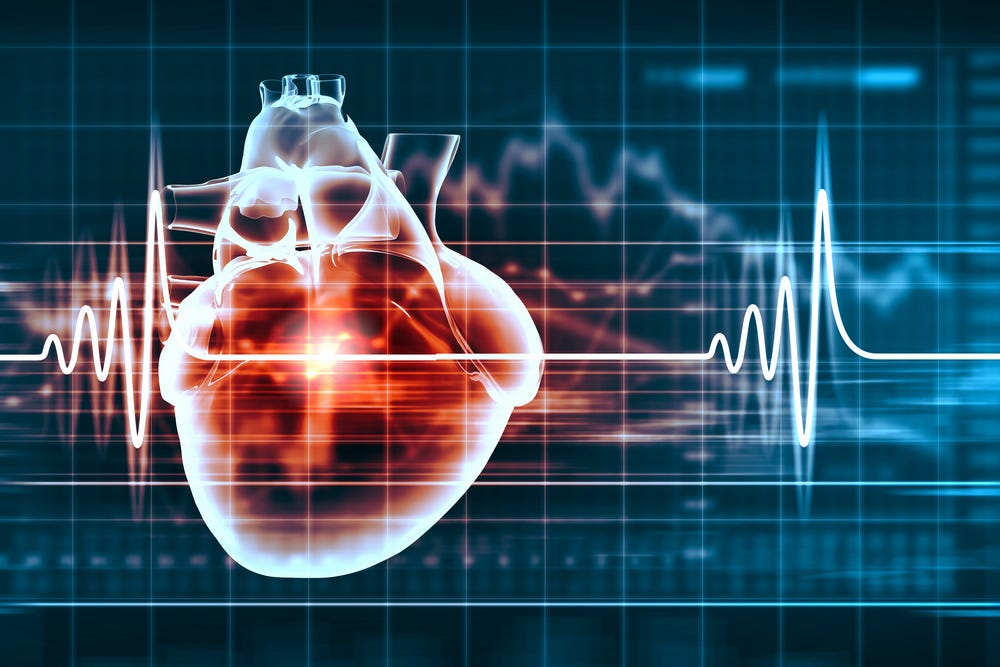

# **Project Summary**
The Machine Learning Cardiovascular Risk Prediction project aims to create an accurate predictive model for evaluating an individual's risk of developing cardiovascular disease (CVD). This ambitious undertaking involves the application of advanced machine learning techniques to analyze diverse data sources, such as electronic health records and lifestyle information from patients. The primary objective of this model is to use these data points to forecast an individual's probability of developing CVD and pinpoint specific risk factors.

The project encompasses multiple essential phases, including the collection and thorough cleansing of data, the process of feature engineering to enhance the predictive capabilities, and the development of a robust machine learning model. This model will be meticulously trained on a comprehensive dataset of patient information.

Ultimately, the project's success hinges on the precision of the predictive model and its capacity to accurately identify individuals who are at elevated risk of CVD. By achieving this, the project holds the potential to significantly contribute to the early detection and prevention of cardiovascular disease, thereby improving overall public health.

# **Objective :**
Develop a predictive model to assess an individual's risk of developing cardiovascular disease (CVD).

# **Problem Statement :**
1. The dataset we have here is from the Ongoing Cardiovascular study on the residents of the town of Framingham, Massachusetts.

2. The Classfication goal is to predict whether the Patient has a 10-yrs. risk of Future Coronary Heart Disease (CHD).

3. On the basis of the dataset we have to build such model that can predict whether Patient will be diseased or not.?

# **Data Description :**
**Demographic:**

Sex: male or female("M" or "F")

Age: Age of the patient

**Behavioral:**

is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.

**Medical( history):**

BP Meds: whether or not the patient was on blood pressure medication

Prevalent Stroke: whether or not the patient had previously had a stroke

Prevalent Hyp: whether or not the patient was hypertensive

Diabetes: whether or not the patient had diabetes

**Medical( current):**

Tot Chol: total cholesterol level

Sys BP: systolic blood pressure

Dia BP: diastolic blood pressure

BMI: Body Mass Index

Heart Rate: heart rate

Glucose: glucose level



# 1. **Importing Libraries and Data Loading**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import random

import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing and loading dataset
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dataset= pd.read_csv('/content/drive/MyDrive/Csv file/data_cardiovascular_risk.csv', encoding='unicode_escape')

In [ ]:
dataset.shape

(3390, 17)

In [ ]:
#knowing the dataset
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
#dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
#understanding the basic data
dataset.describe(include = 'all')

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1694.500000,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [5]:
#columns attribute names
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#duplicate value count
dataset.duplicated().sum()

0

In [ ]:
#checking for missing values
dataset.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

**What did you know about your dataset?**

* There are 3390 rows/entries and 17 columns/attributes.

* There are 9-float values, 6-int values and 2-object values (Sex and is_smoking).

* There are zero duplicate values in our dataset.

* In our dataset there are many null values but max. null values are in Glucose attribute(304) .

In [ ]:
# checking for unique value for each variables
for i in dataset:
  print(f'Total count of Unique values of {i} column - {dataset[i].nunique()}\n')
  print(f'Total count of Unique values of {i} column - {dataset[i].unique()}\n')
  print('=======================================================================================================================')

Total count of Unique values of id column - 3390

Total count of Unique values of id column - [   0    1    2 ... 3387 3388 3389]

Total count of Unique values of age column - 39

Total count of Unique values of age column - [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]

Total count of Unique values of education column - 4

Total count of Unique values of education column - [ 2.  4.  1.  3. nan]

Total count of Unique values of sex column - 2

Total count of Unique values of sex column - ['F' 'M']

Total count of Unique values of is_smoking column - 2

Total count of Unique values of is_smoking column - ['YES' 'NO']

Total count of Unique values of cigsPerDay column - 32

Total count of Unique values of cigsPerDay column - [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]

Total count of Unique values of BPMeds column - 2

Total 

#2. **Data Wrangling**

**(cigsPerDay) Total cigrattes per day exploration with age groups:**

* Chemicals in cigarette smoke cause the blood to thicken and form clots inside veins and arteries.

* Blockage from a clot can lead to a heart attack and sudden death.

* MIN. and MAX. age of patient's are 32yrs & 70yrs.

We have divided age columns in 4-age groups as age1, age2, age3 & age4.
All age groups have their range mentioned below

In [6]:
#Dividing age column into 4 groups
age1 = dataset[dataset['age'] <= 40]
age2 = dataset[(dataset['age'] > 40) & (dataset['age'] <= 50)]
age3 = dataset[(dataset['age'] > 50) & (dataset['age'] <= 60)]
age4 = dataset[(dataset['age'] > 60) & (dataset['age'] <= 70)]

In [7]:
#Dividing age column into 4 groups
age1 = dataset[dataset['age'] <= 40]
age2 = dataset[(dataset['age'] > 40) & (dataset['age'] <= 50)]
age3 = dataset[(dataset['age'] > 50) & (dataset['age'] <= 60)]
age4 = dataset[(dataset['age'] > 60) & (dataset['age'] <= 70)]

In [8]:
#total cigrattes consumed at the age group of age1 below 40 yearts old
print(f"total cigrattes {age1['cigsPerDay'].sum()}")
print()
print(age1.groupby(['age','sex'])['cigsPerDay'].sum().reset_index(name =  'Total cigrattes per day'))

total cigrattes 6813.0

    age sex  Total cigrattes per day
0    32   F                     15.0
1    33   F                     20.0
2    33   M                      0.0
3    34   F                     80.0
4    34   M                     60.0
5    35   F                     89.0
6    35   M                    223.0
7    36   F                    228.0
8    36   M                    505.0
9    37   F                    460.0
10   37   M                    491.0
11   38   F                    473.0
12   38   M                    765.0
13   39   F                    556.0
14   39   M                   1021.0
15   40   F                    666.0
16   40   M                   1161.0


In [ ]:
# total cigrattes consumed at the age group of age2 i.e 40-50 years old
print(f"total cigrattes {age2['cigsPerDay'].sum()}")
print()
print(age2.groupby(['age','sex'])['cigsPerDay'].sum().reset_index(name =  'Total cigrattes per day'))

total cigrattes 13833.0

    age sex  Total cigrattes per day
0    41   F                    507.0
1    41   M                   1064.0
2    42   F                    586.0
3    42   M                   1055.0
4    43   F                    559.0
5    43   M                    968.0
6    44   F                    490.0
7    44   M                   1156.0
8    45   F                    432.0
9    45   M                    794.0
10   46   F                    781.0
11   46   M                    710.0
12   47   F                    667.0
13   47   M                    730.0
14   48   F                    407.0
15   48   M                    890.0
16   49   F                    265.0
17   49   M                    653.0
18   50   F                    460.0
19   50   M                    659.0


In [ ]:
# total cigrattes consumed at the age group of age2 i.e 50-60 years old
print(f"total cigrattes {age3['cigsPerDay'].sum()}")
print()
print(age3.groupby(['age','sex'])['cigsPerDay'].sum().reset_index(name =  'Total cigrattes per day'))

total cigrattes 7626.0

    age sex  Total cigrattes per day
0    51   F                    361.0
1    51   M                    752.0
2    52   F                    276.0
3    52   M                    541.0
4    53   F                    283.0
5    53   M                    667.0
6    54   F                    193.0
7    54   M                    642.0
8    55   F                    167.0
9    55   M                    477.0
10   56   F                    252.0
11   56   M                    455.0
12   57   F                    224.0
13   57   M                    402.0
14   58   F                    251.0
15   58   M                    459.0
16   59   F                    188.0
17   59   M                    514.0
18   60   F                    180.0
19   60   M                    342.0


In [ ]:
# total cigrattes consumed at the age group of age2 i.e 60-70 years old
print(f"total cigrattes {age4['cigsPerDay'].sum()}")
print()
print(age4.groupby(['age','sex'])['cigsPerDay'].sum().reset_index(name =  'Total cigrattes per day'))

total cigrattes 2274.0

    age sex  Total cigrattes per day
0    61   F                    171.0
1    61   M                    296.0
2    62   F                     61.0
3    62   M                    367.0
4    63   F                    144.0
5    63   M                    413.0
6    64   F                    155.0
7    64   M                    246.0
8    65   F                     13.0
9    65   M                     54.0
10   66   F                     20.0
11   66   M                     91.0
12   67   F                     47.0
13   67   M                    111.0
14   68   F                     40.0
15   68   M                     40.0
16   69   F                      0.0
17   69   M                      5.0
18   70   F                      0.0


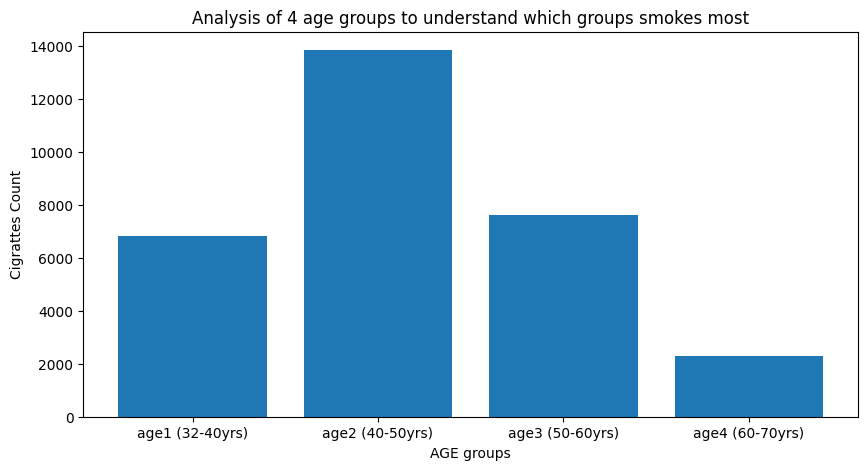

In [ ]:
#showing the distribution of agegroups
x = np.array(["age1 (32-40yrs)", "age2 (40-50yrs)", "age3 (50-60yrs)", "age4 (60-70yrs)"])
y = np.array([age1['cigsPerDay'].sum(), age2['cigsPerDay'].sum(), age3['cigsPerDay'].sum(), age4['cigsPerDay'].sum()])

# Bar-plot plotting
fig = plt.figure(figsize = (10, 5))
plt.xlabel("AGE groups")
plt.ylabel("Cigrattes Count")
plt.title("Analysis of 4 age groups to understand which groups smokes most")

plt.bar(x,y)
plt.show()

**CONCLUSION:-**

* The insight we got from the above bar graph, that the second age group age2 (range 40-50 yrs) old patients having the highest Ciggrattes consumption followed by age3, age1 and age4.
* people smoke more when they are young or at their mid age.
People smoke less as they starts grow old.
*we found that young people starts consuming ciggrattes and reach their peak by the age of 40-50 yrs old and later on this consumption range starts decreasing due to oldage.

**CHD (Coronary_Heart_disease) ATTRIBUTES AND THEIR BEST RANGE FOR A HEALTHY BODY:--**

* Best range for Cholestrol (totChol) for healthy body = Less than 200
* Best range for Systolic-BP (sysBP) for healthy body = 120 to 145
* Best range for Diastolic-BP (diaBP) for healthy body = 80 to 95
* Best range for Body-Mass-Index (BMI) for healthy body = 18.5 to 25 BMI
* Best range for HeartRate (heartrate) for healthy body = 60 to 100
* Best range for Glucose (glucose) for healthy body = 70 to 100

In [ ]:
# Here we have applied conditions for every single attribute that has an effect for CHD. But here we have filtered only
Healthy_CHD = dataset.loc[(dataset['totChol']<=200) &
              (dataset['sysBP']>=120) & (dataset['sysBP']<= 145) &
              (dataset['diaBP']>=80) & (dataset['diaBP']<= 95) &
              (dataset['BMI']>=18.5) & (dataset['BMI']<= 25)&
              (dataset['heartRate']>=60) & (dataset['heartRate']<= 100)&
              (dataset['glucose']>=70) & (dataset['glucose']<= 100)]
Healthy_CHD.reset_index()

,index,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,21,21,38,2.0,F,NO,0.0,0.0,0,0,0,175.0,142.0,86.0,22.01,82.0,73.0,0
1,32,32,51,3.0,F,NO,0.0,0.0,0,1,0,198.0,142.5,80.0,23.86,76.0,100.0,0
2,65,65,37,4.0,F,YES,10.0,0.0,0,0,0,156.0,120.0,87.0,21.80,66.0,89.0,0
3,133,133,61,NaN,M,YES,5.0,0.0,0,0,0,175.0,134.0,82.5,18.59,72.0,75.0,1
4,156,156,39,2.0,F,YES,20.0,0.0,0,0,0,190.0,137.0,81.0,19.57,80.0,85.0,1
5,265,265,41,1.0,F,NO,0.0,NaN,0,0,0,179.0,121.0,83.0,23.04,66.0,90.0,0
6,328,328,41,1.0,F,NO,0.0,0.0,0,0,0,193.0,127.0,83.0,21.49,60.0,80.0,0
7,344,344,62,1.0,M,YES,20.0,0.0,0,0,0,168.0,129.5,87.0,20.56,65.0,80.0,0
8,395,395,37,4.0,F,YES,20.0,0.0,0,0,0,186.0,135.0,91.0,21.48,66.0,84.0,0
9,435,435,39,2.0,M,YES,30.0,0.0,0,0,0,199.0,124.0,86.0,23.39,76.0,72.0,0


In [ ]:
#total number of records that have the best healthy body ranges in all attributes
Healthy_CHD.shape

(43, 17)

**What all manipulations have you done and insights you found?**

* First of all we have compared CigsPerDay columns with age in 4-different groups of age , and insight we found is mention above only.
* We have gathered all the attributes that lead to CHD disease ,but we put conditions in such manner that we have got people who are completely in the range of Healthy body in all aspects.
* The count of people who are safe under the healthy range are 39 and still 4 people somehow got some CHD.
* We have mentioned all the insights in every single manipulation we have done above.


#3. **Exploratory Data Analysis**

3.1 **Univariate Analysis**

In [ ]:
features = dataset.describe().columns
features

Index(['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

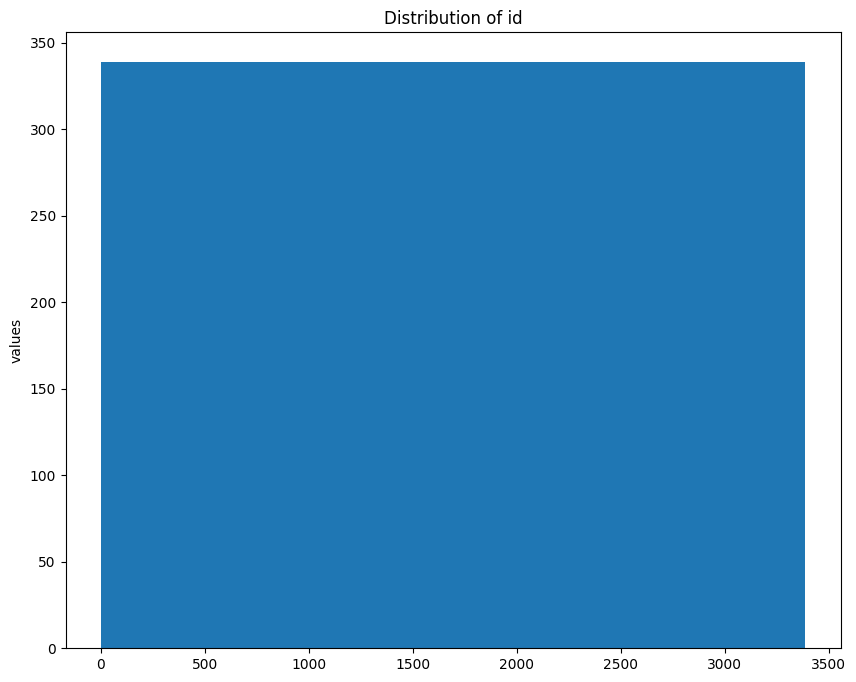

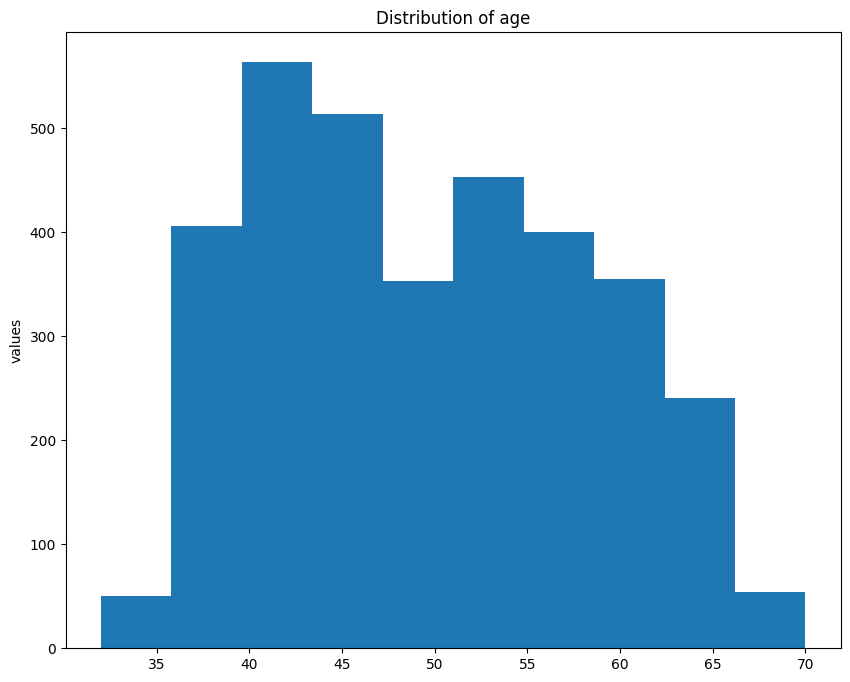

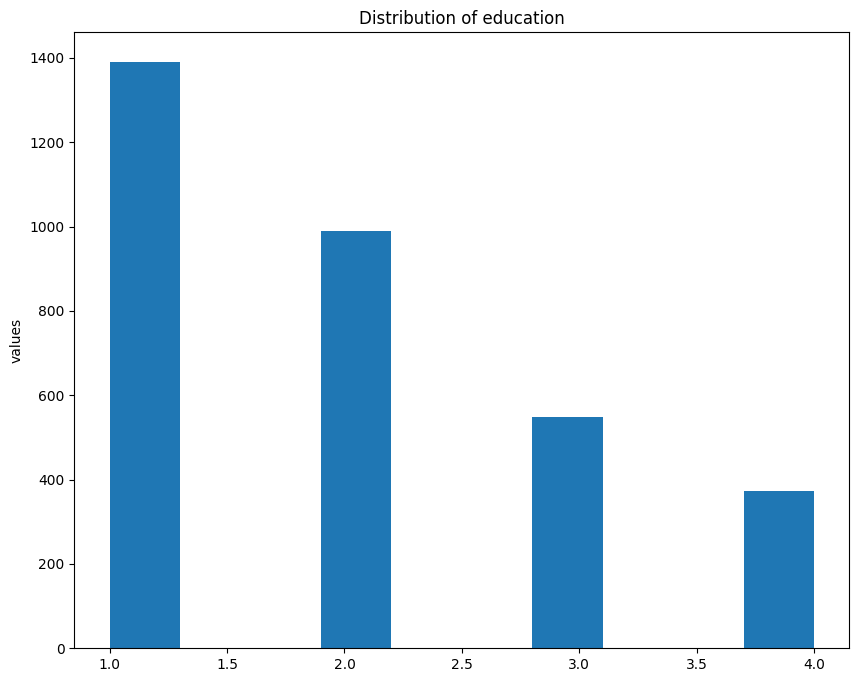

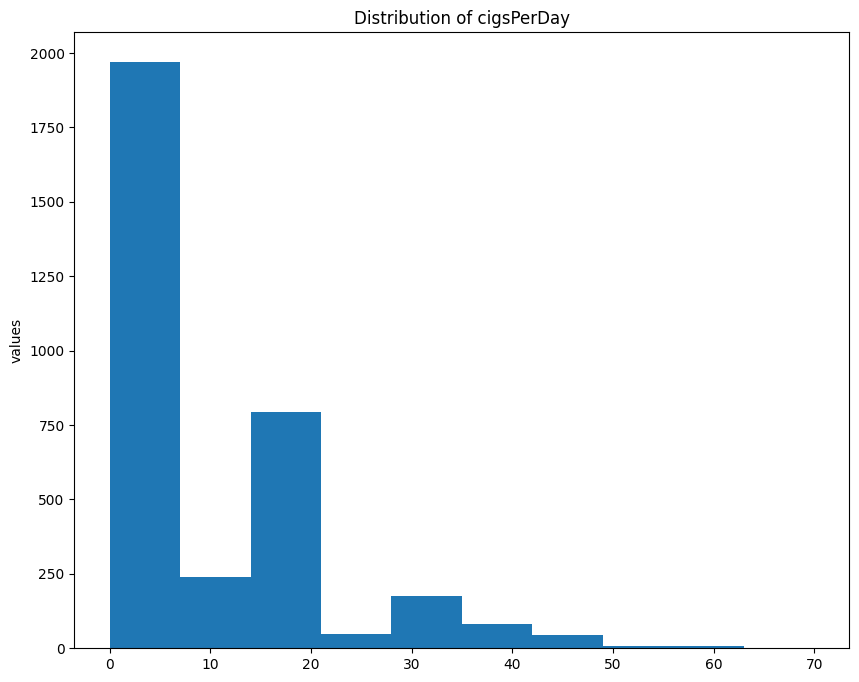

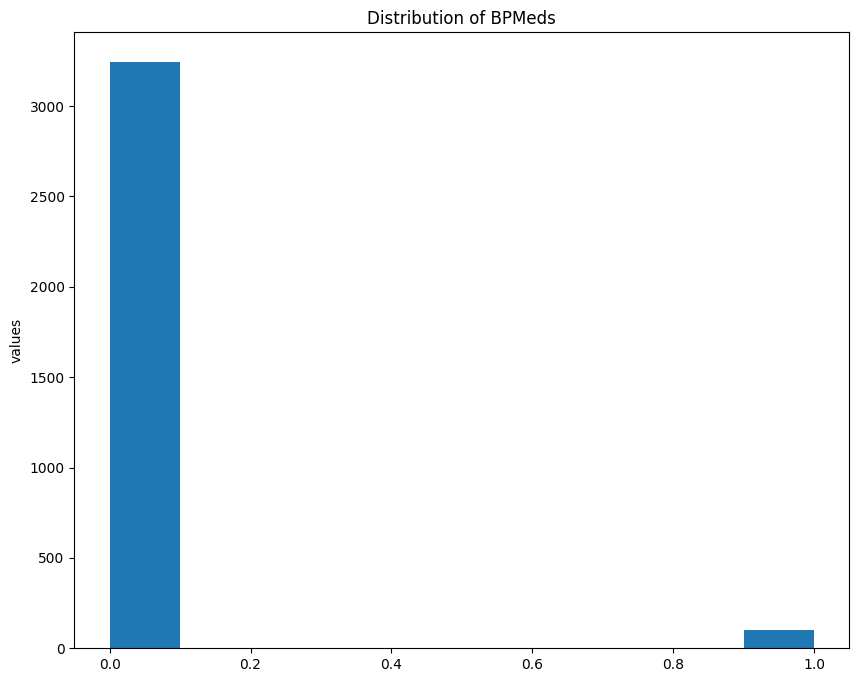

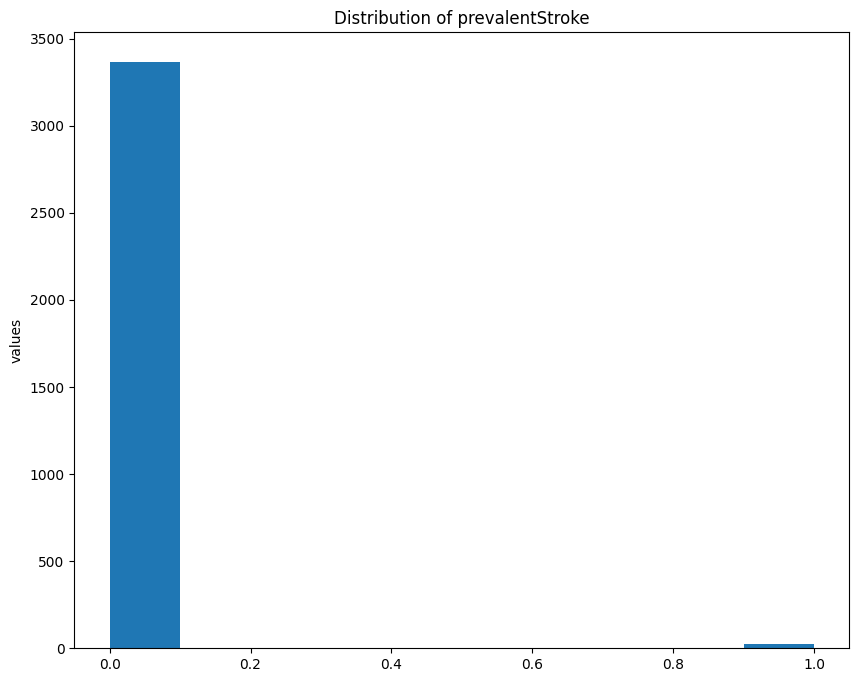

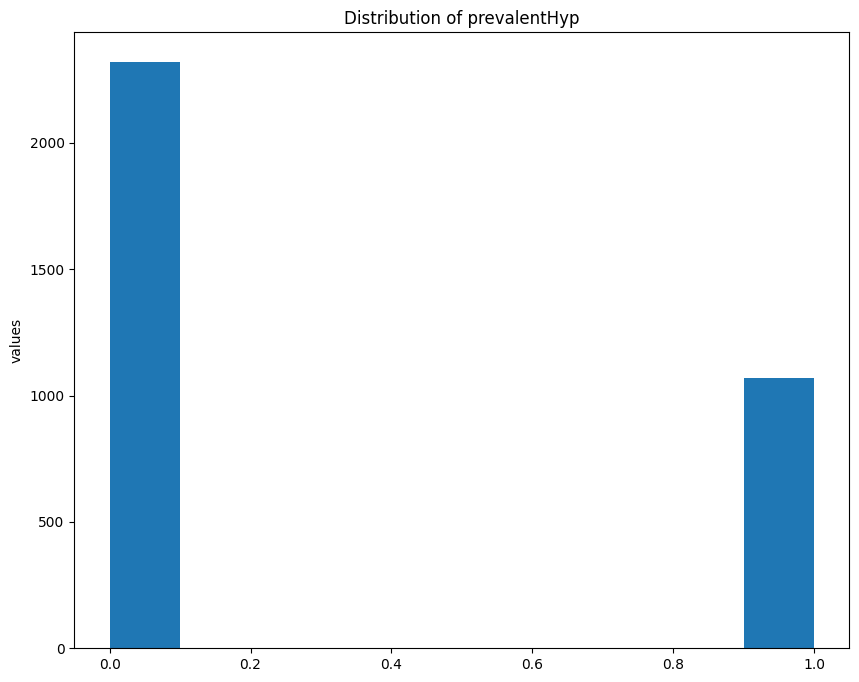

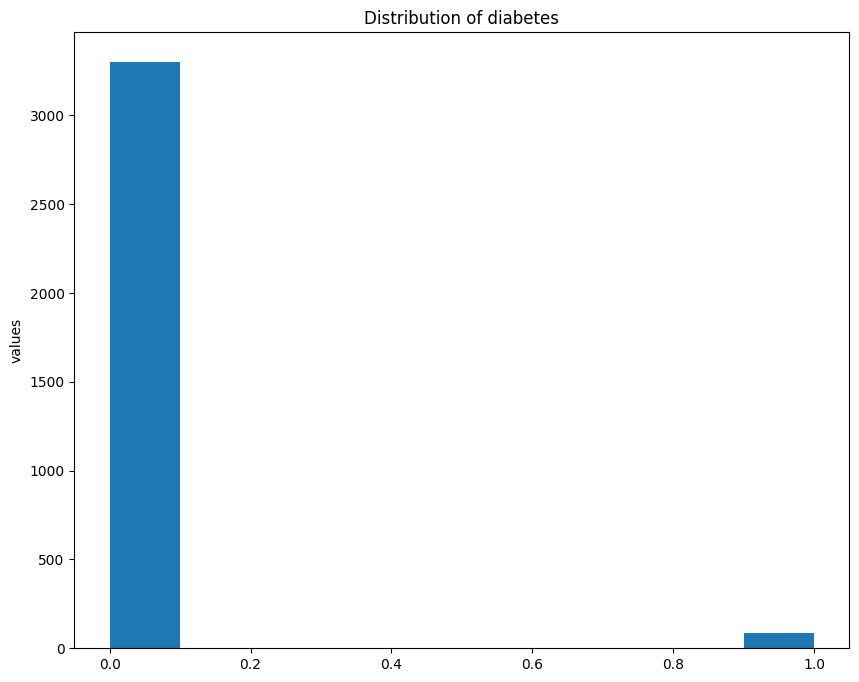

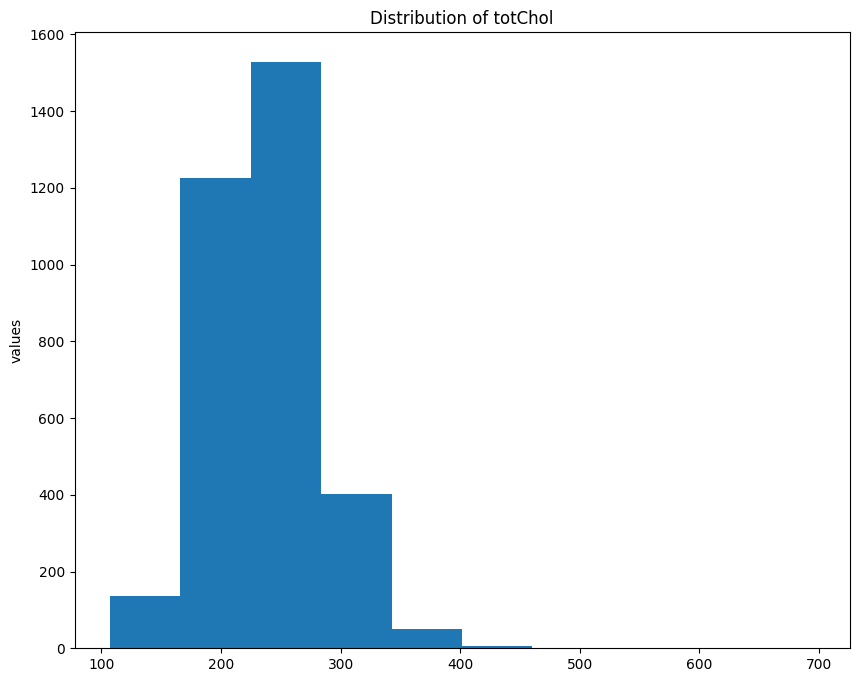

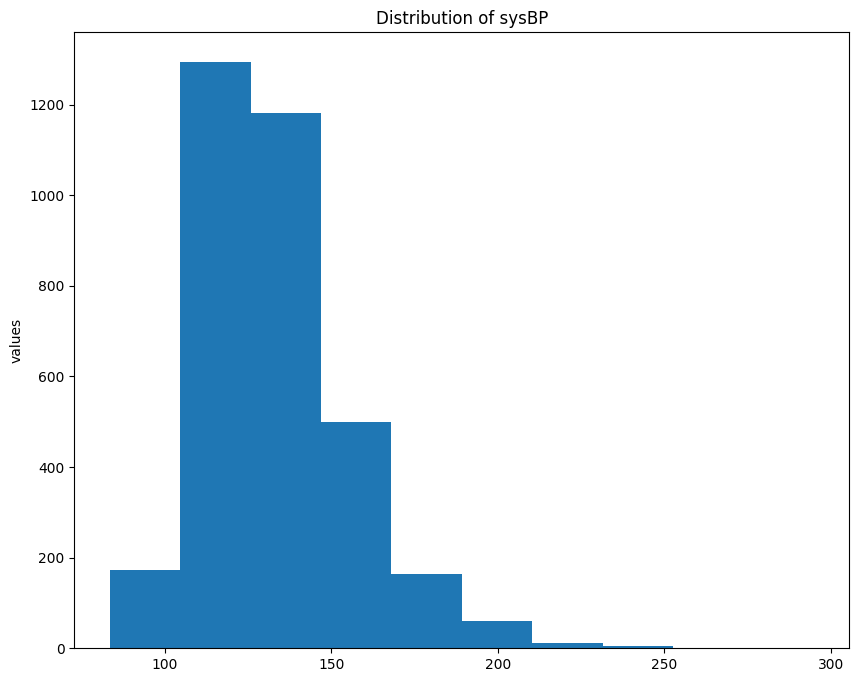

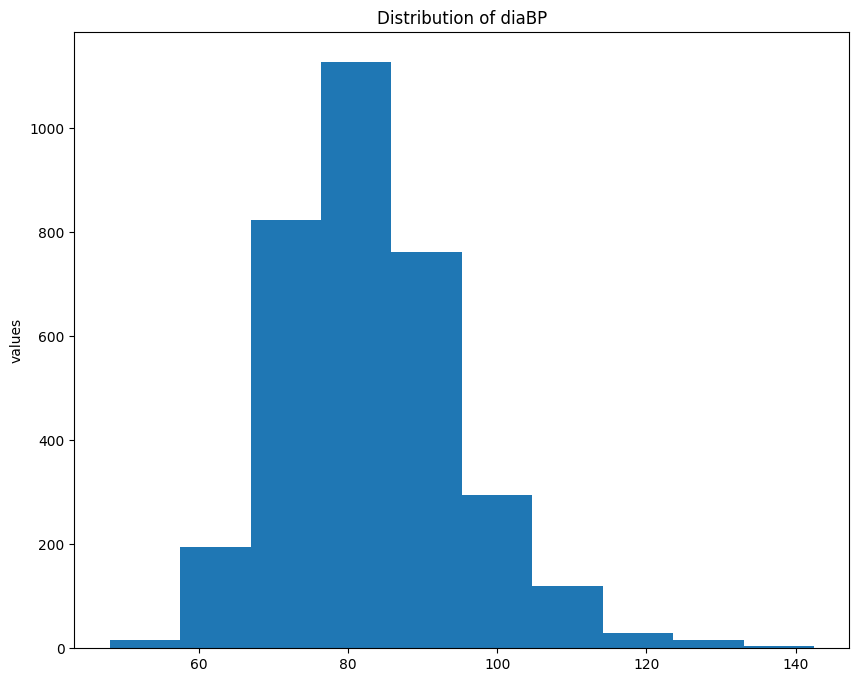

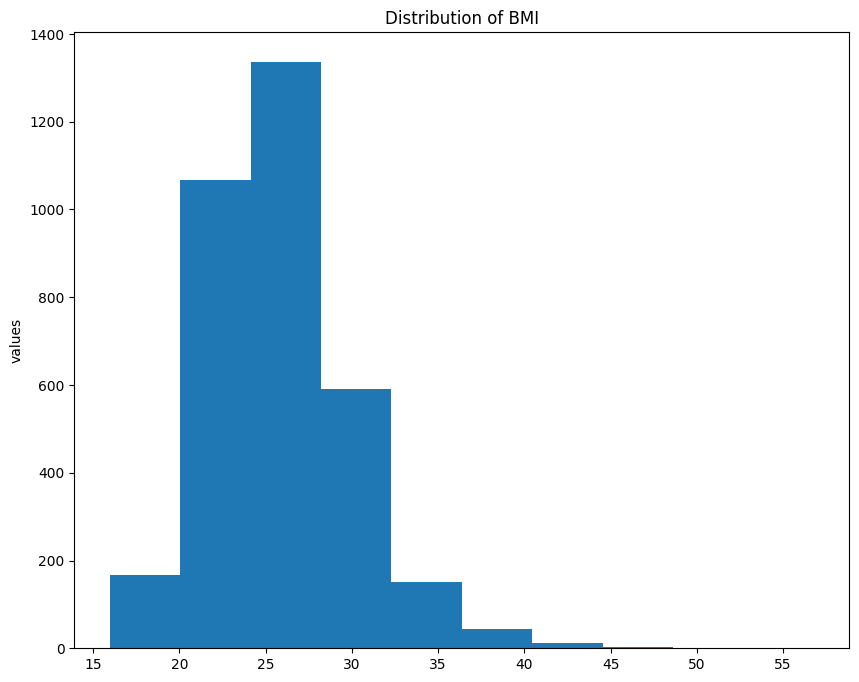

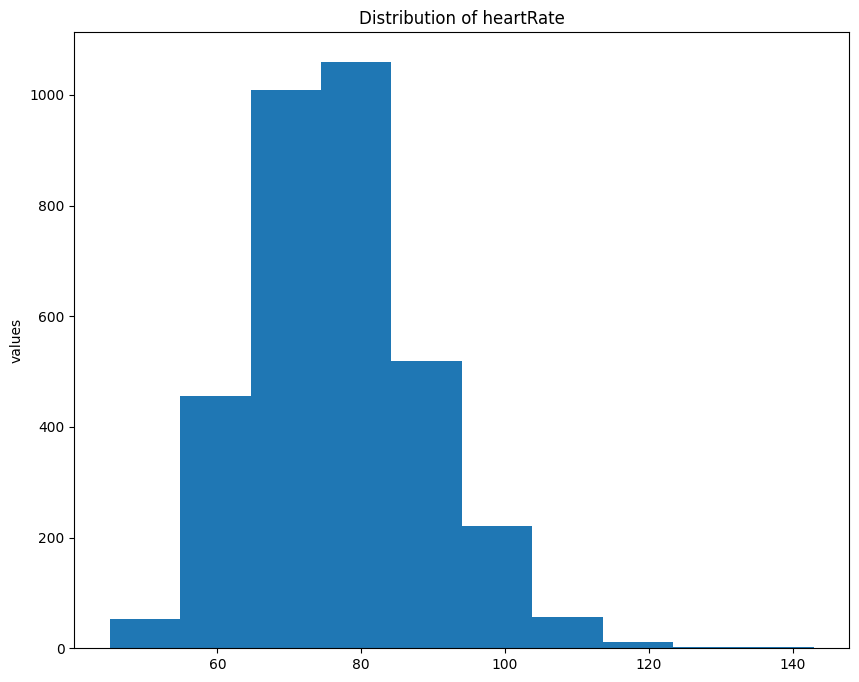

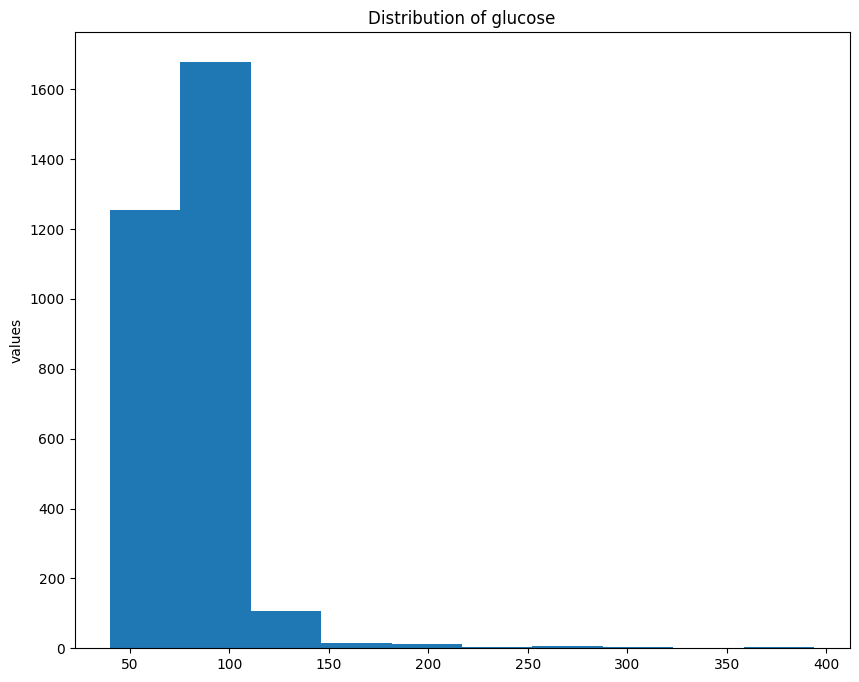

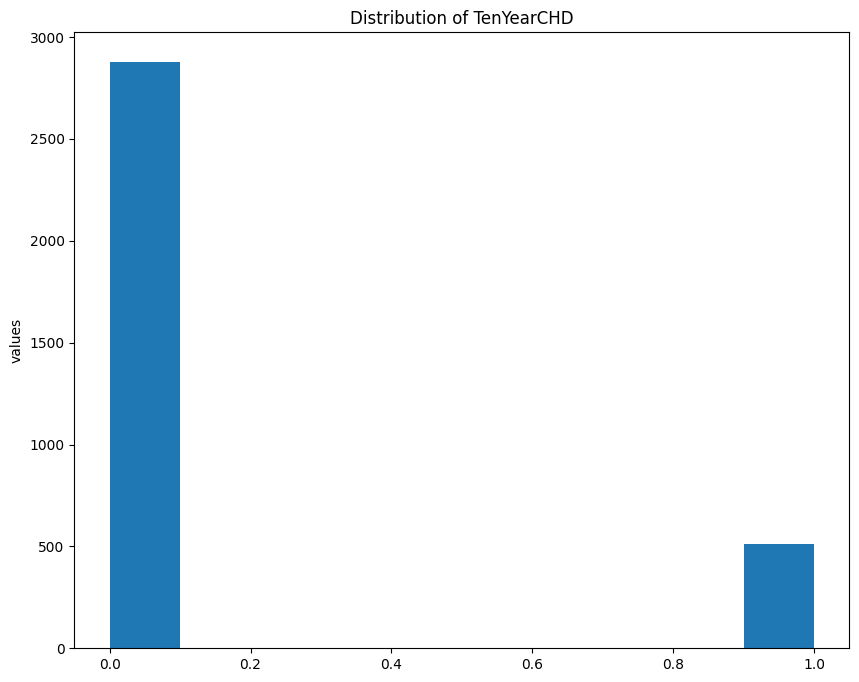

In [ ]:
for col in features:
  plt.figure(figsize = (10,8))
  plt.hist(dataset[col])
  plt.gca()
  plt.title('Distribution of {}'.format(col))
  plt.ylabel('values')

**What is/are the insight(s) found from the chart?**

**From BPMeds:**

* 0 -> People not taking BP medicine.
* 1 -> Peope taking BP medicine.
* In our dataset we found that (3,246)max. number of people are free from BP medicine, while 100 people are taking it.

**From prevalentStroke:**


* 0 -> Peope do not have a history of stroke.
* 1 -> Peope have a history of stroke.
* In our dataset we found that (3,368)max. number of people do not have any history of stroke, while 22 people have an history of stroke.


**From prevalentHyp:**


* 0 -> People do not have an history of Hypertension.
* 1 -> Peope have a history of hypertenstion.
* In our dataset we found that (2,321)max. number of people are free from Hypertension while 1069 people have an history of hypertension.



**From diabetes:**

* There are 97.43% of people who have don't Diabetes and rest 2.57% of people have it.

**From TenYearCHD:**

* we can see that almost 85% of people don't have any CHD (Coronary Heart Disease), and rest 15% of people are facing CHD disease.
* From the Sub-plot we can see total count as well.
* NOTE:- From the Above visualisation analysis we find that our categorical column is not balanced.

**From age distribution:**

* Maximum number of people lies in between the Age of 39, 40, 41, 42 & 46.
* If we look at above the graph in whole. We can see it's almost like Normal Distribution but right-Skewed.


**From cigratte per day:**
* We found that there are 606 people who comsume maximum 20 ciggrattes per day.
* We found that there are 48 people who comsume minimum 1 ciggrattes per day.
* And as of 0 means, there are more than 600 people who don't smoke.

**From diaBP:**
* The plot shows that the distribution of dabP is approximately normal.
* The peak of the curve is at the lower end of the therapeutic range, which suggests that most patients have adequate dabP levels.
* However, some patients may have dabP levels that are too low or too high.

**From BMI Distribution:**
* According to the above BMI meter we find that people who are in range of 18.5 - 25 are considered Normal.
* we found 1512 people are normal rest are either Underweight, Overweight or Obese.

**From heartrate:**
* Best HeartRate range is 70 - 133 for the people in our dataset.
* There are 2,404 people who are in the range of Good heartRate/minute.

F    1923
M    1467
Name: sex, dtype: int64

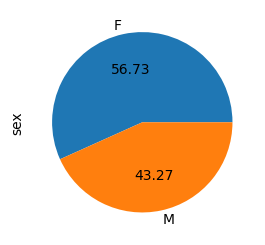

In [ ]:
#chart to show male and female count
plt.subplot(1,2,2)
dataset['sex'].value_counts().plot(kind = 'pie',autopct='%.2f')

dataset['sex'].value_counts()

**What is/are the insight(s) found from the chart?**

* There are 1467 male and 1923 female in the dataset.
* There are more females in comparison to the males.
* The percentage of male and female are 43.27 & 56.73.

NO     1703
YES    1687
Name: is_smoking, dtype: int64

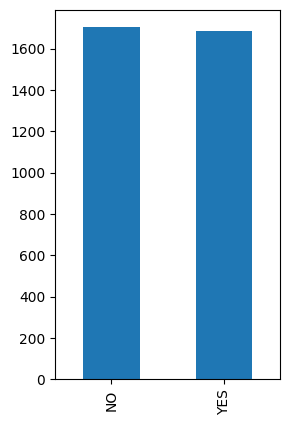

In [ ]:
#to show the count of people smoking or not
plt.subplot(1,2,1)
dataset['is_smoking'].value_counts().plot(kind = 'bar')


dataset['is_smoking'].value_counts()


**What is/are the insight(s) found from the chart?**

* There are 1,687 people who smokes ciggratte and there are 1703 who don't smoke.
* People who smoke and don't are almost same.
* It will help us to predict the future of those people who will suffer from CHD in next 10-yrs or not.

3.2 **Bivariate and Multy variate Analysis:**

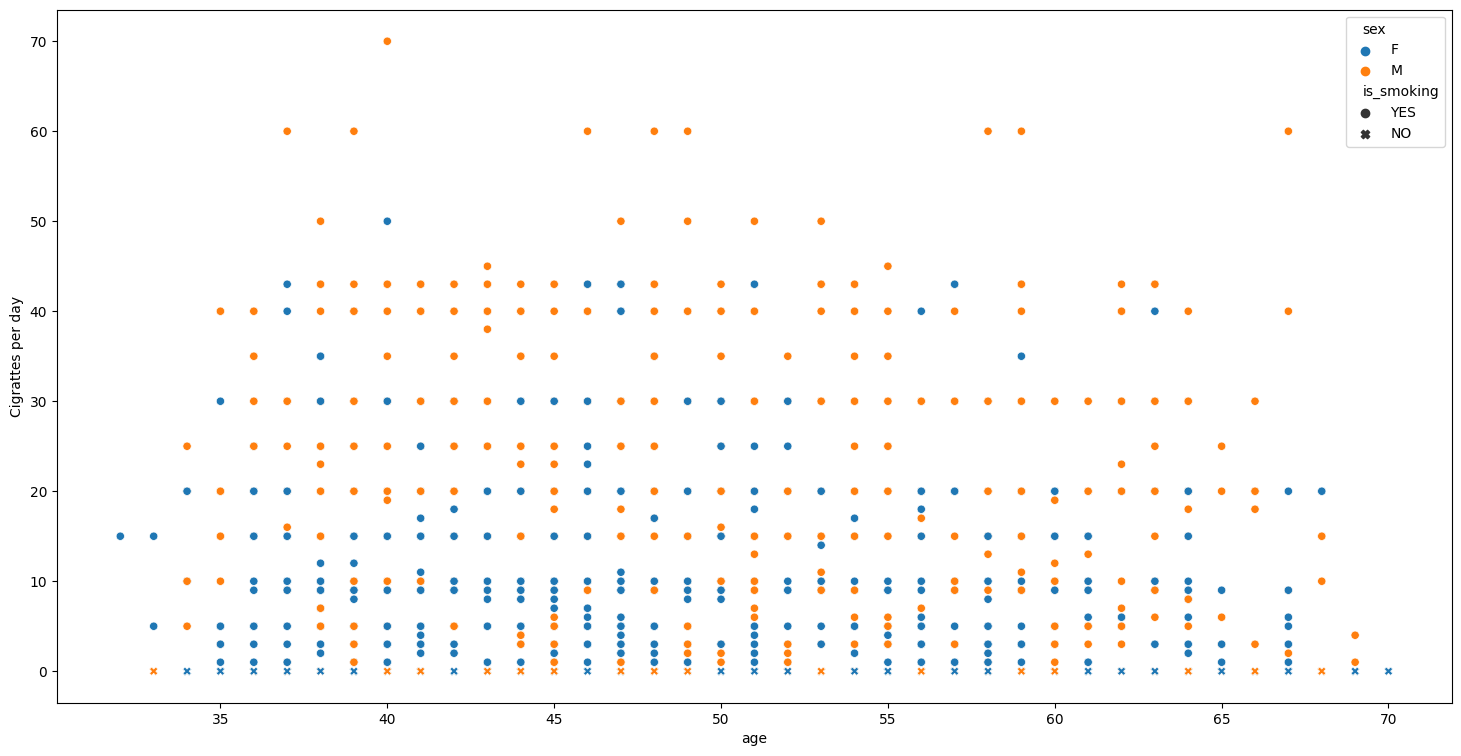

In [ ]:
# visualise how many people smoke in different age group
plt.figure(figsize=(18,9))
sns.scatterplot(x ='age',y = 'cigsPerDay', hue='sex', style='is_smoking', data =dataset)

plt.ylabel('Cigrattes per day')
plt.xlabel('age')
plt.show()

<Axes: xlabel='sex', ylabel='age'>

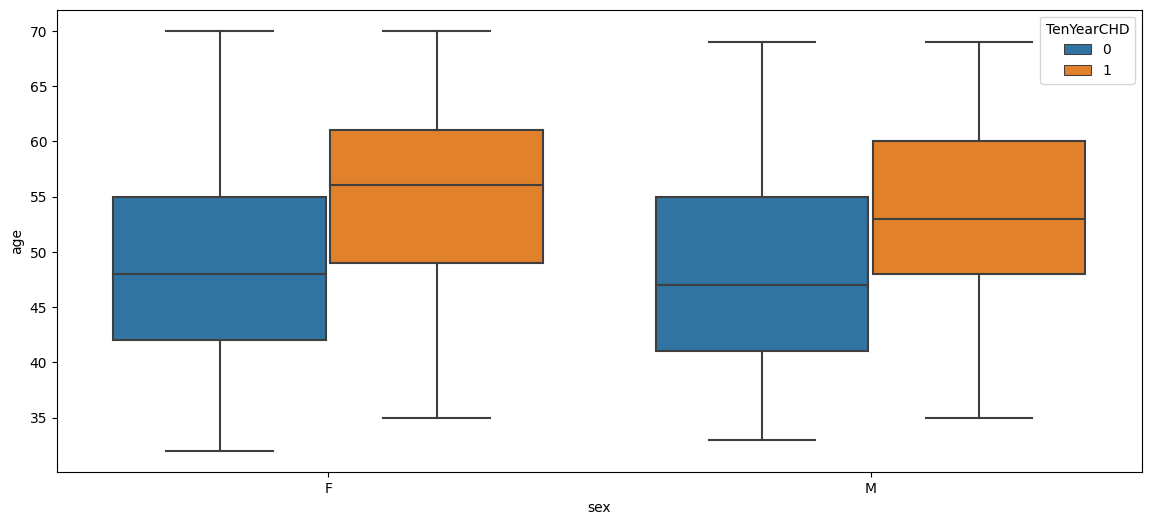

In [ ]:
# to show CHD problem in different age group
plt.figure(figsize=(14,6))
sns.boxplot(x = 'sex', y = 'age', hue ='TenYearCHD', data = dataset)

* In both males and females from age 42 to 55 people don't have any CHD Probelem but from age around 50-60 people do have CHD problems.

<Axes: xlabel='age', ylabel='BMI'>

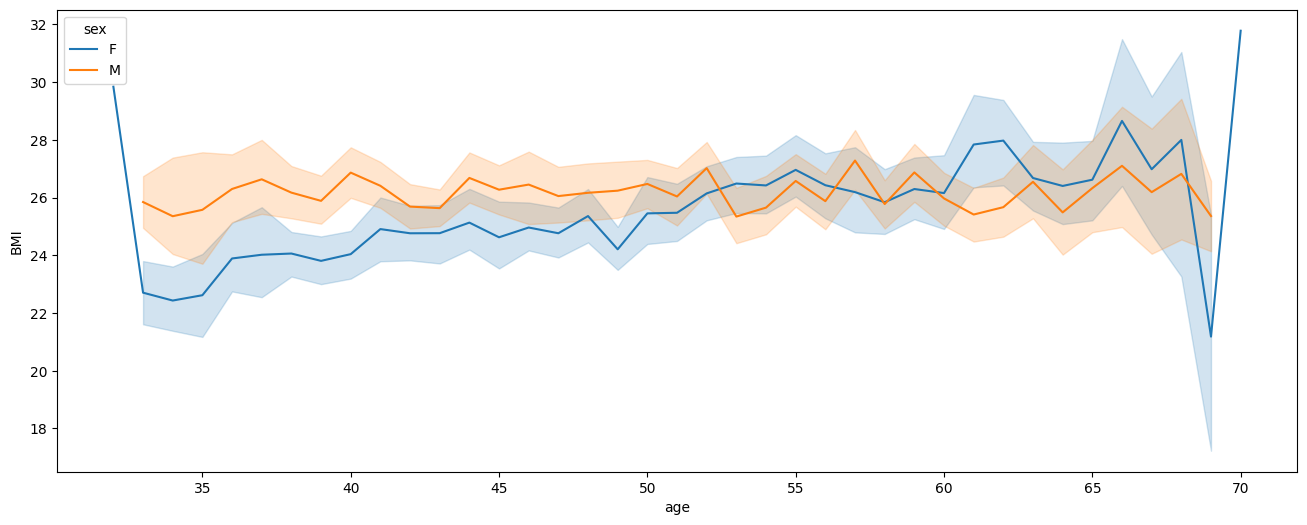

In [ ]:
#to show different gender in different age group having BMI
plt.figure(figsize=(16,6))
# Show the plot
sns.lineplot(x='age', y='BMI', hue='sex', data = dataset)

Till age 53 BMI is increasing in both male and females but after 53 male's BMI is decreasing slightly and in Women's BMI is still rising.

<Axes: xlabel='age', ylabel='totChol'>

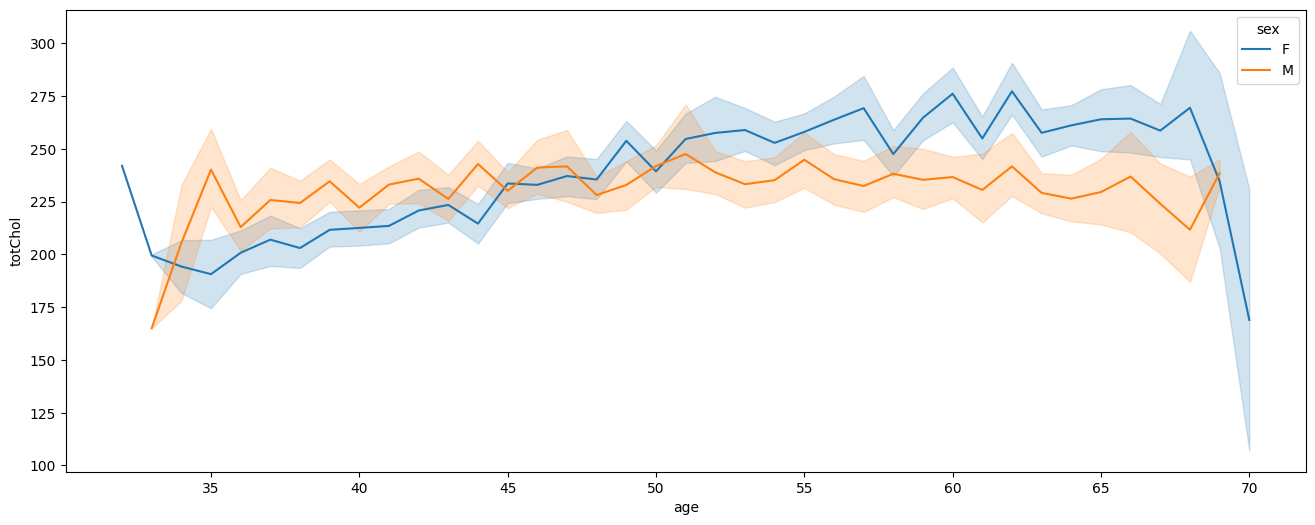

In [ ]:
#cholesterol problem in different age group in both gender
plt.figure(figsize=(16,6))
# Show the plot
sns.lineplot(x='age', y='totChol', hue='sex', data = dataset)

* Total Cholesterol should be below 200.
* Till age 45 both mens and womens have a little higher Cholesterol than necessary (i.e., 200), but after crossing 45 mens Cholesterol is stablizing and womens Cholesterol still rising.

<Axes: xlabel='age', ylabel='glucose'>

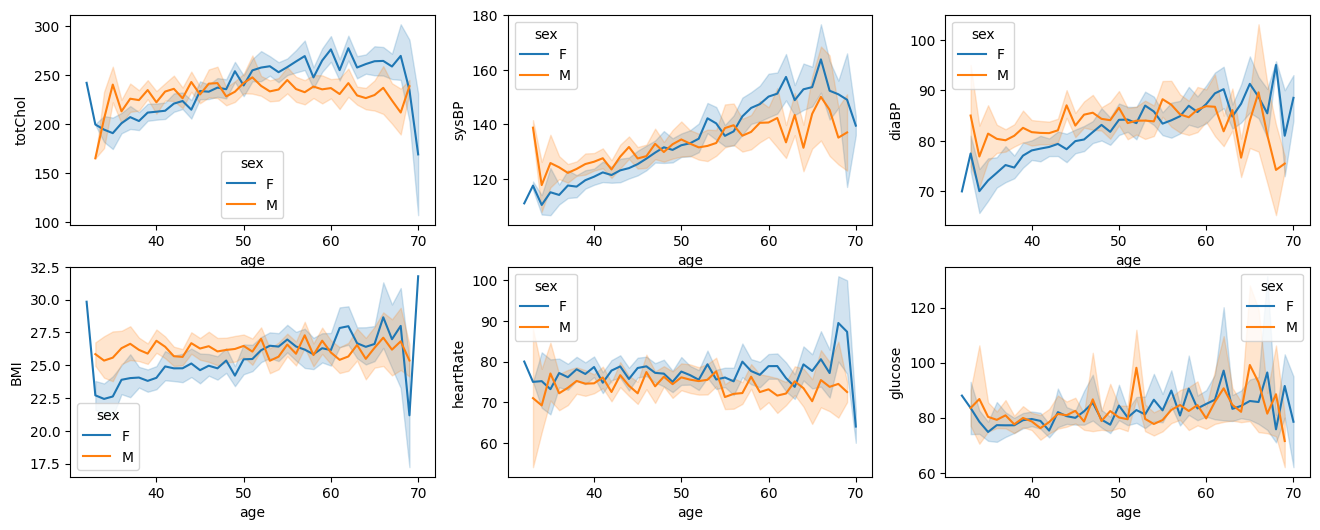

In [ ]:
#distribution of different colums
plt.figure(figsize=(16,6))
plt.subplot(2,3,1)
sns.lineplot(x='age', y='totChol', hue='sex', data = dataset)

plt.subplot(2,3,2)
sns.lineplot(x='age', y='sysBP', hue='sex', data = dataset)

plt.subplot(2,3,3)
sns.lineplot(x='age', y='diaBP', hue='sex', data = dataset)

plt.subplot(2,3,4)
sns.lineplot(x='age', y='BMI', hue='sex', data = dataset)

plt.subplot(2,3,5)
sns.lineplot(x='age', y='heartRate', hue='sex', data = dataset)

plt.subplot(2,3,6)
sns.lineplot(x='age', y='glucose', hue='sex', data = dataset)

Text(0.5, 1.0, 'graph of TenYearCHD & BMI')

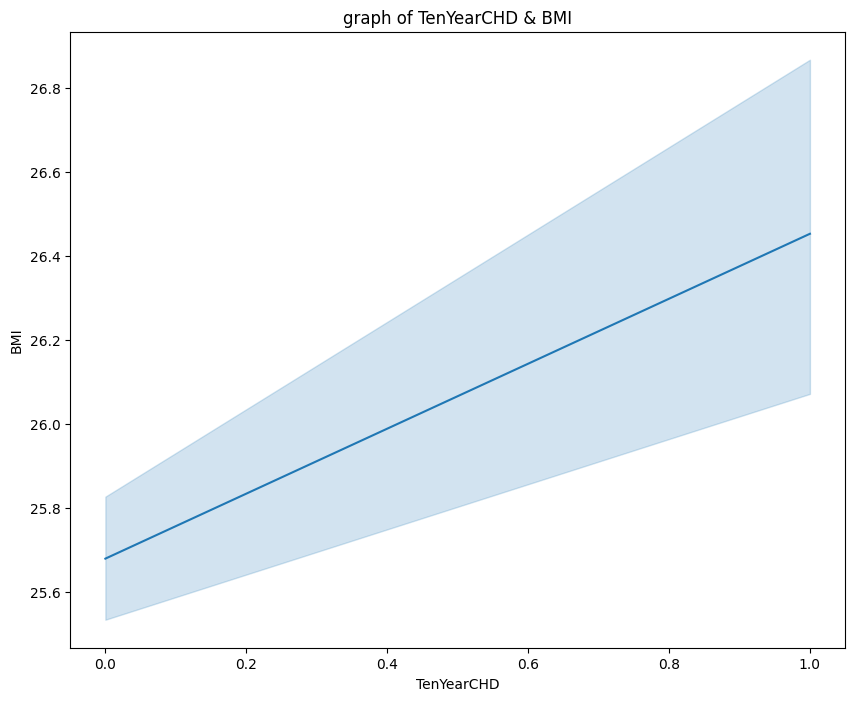

In [12]:
# Understanding the relationship between target variable and BMI.

plt.figure(figsize = (10,8))
sns.lineplot(x = dataset['TenYearCHD'], y = dataset['BMI'])
plt.title('graph of TenYearCHD & BMI')


Analysis: As you can see there is the positive relationship between CHD and BMI. The higher the BMI, more prone to CHD and vice-versa.

<Axes: >

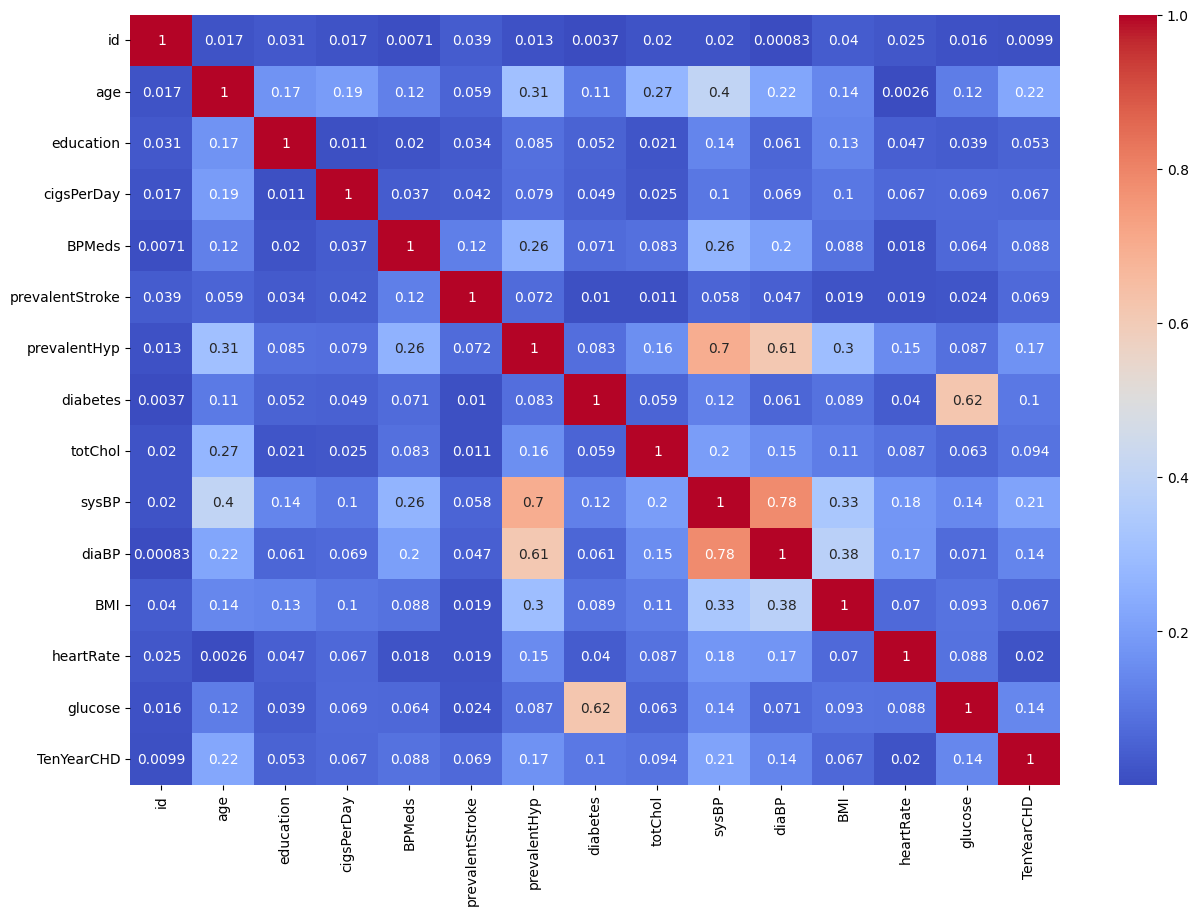

In [ ]:
#Checking the correlation between variables.
corr = dataset.corr()
plt.figure(figsize = (15,10))
sns.heatmap(abs(corr), cmap = 'coolwarm', annot= True)

* There is a strong positive co-relation between " sysBP & diaBP " 0.78.
* There is a good co-relation between " sysBP & prevalentHyp " 0.70.
* There is a good co-relation between " Diabetes & Glucose " 0.62.
* There is a co-relation between " diaBP & prevalentHyp " 0.61.

So from the correlation we can see that no one variable is strongly correlated with the dependent variable.

#4.**Data Pre-Processing and Feature - Engineering:**

Before manipulating our data let's create a copy of the data so we should not loose any data and can use the original data whenever necessery

In [ ]:
df = dataset.copy()

In [ ]:
#droping id column
df = df.drop(['id'], axis = 1)

# 4.1. Catagorical Encoding:

In [ ]:
# Defining 3 lists containing the column names of
# a. dependent variables
# b. continuous independent variables
# c. categorical independent variables
# This is defined based on the number of unique values for each attribute.

dependent_var = ['TenYearCHD']
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_var = ['education', 'sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']


# Encode your categorical columns
# Encoding into binary columns

df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

**What all categorical encoding techniques have you used & why did you use those techniques?**

We used the binary Encoding to transform the Categorical columns into Binary ones.

# 4.2. Handling Missing Values

In [ ]:

# Handling Missing Values & Missing Value Imputation
print(f" Total missing values {df.isna().sum().sum()}")
df.isna().sum()


 Total missing values 510


age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:

# Replacing the missing values in the categorical columns with its mode (most repeated value).
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mode()[0])


# education distribution after mode imputation
df.education.value_counts()


# bp_meds distribution after mode imputation
df.BPMeds.value_counts()


0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
# education distribution after mode imputation
df.education.value_counts()

1.0    1478
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [ ]:
# bp_meds distribution after mode imputation
df.BPMeds.value_counts()

0.0    3290
1.0     100
Name: BPMeds, dtype: int64

In [ ]:
# Mean and median number of cigarettes per day
df.cigsPerDay.mean().round(0),df.cigsPerDay.median()

(9.0, 0.0)

In [ ]:

# All missing values in the cigs_per_day column
df.cigsPerDay.mean().round(0),df.cigsPerDay.median()

# All missing values in the cigs_per_day column
df[df['cigsPerDay'].isna()]


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
422,55,1.0,0,1,NaN,0.0,0,1,0,213.0,163.0,91.0,28.66,69.0,66.0,0
466,45,3.0,1,1,NaN,0.0,0,1,0,170.0,145.5,99.0,26.74,83.0,85.0,0
469,42,1.0,1,1,NaN,0.0,0,0,0,196.0,123.0,73.0,22.06,66.0,NaN,0
491,61,1.0,0,1,NaN,0.0,0,1,0,356.0,168.0,98.0,27.30,103.0,106.0,0
538,41,1.0,0,1,NaN,0.0,0,0,0,171.0,135.0,82.5,24.35,79.0,82.0,0
767,54,1.0,1,1,NaN,0.0,0,0,0,219.0,110.0,72.0,26.05,95.0,86.0,0
1461,47,2.0,0,1,NaN,0.0,0,0,0,365.0,127.0,76.0,24.44,72.0,80.0,0
1467,49,1.0,0,1,NaN,0.0,0,0,0,252.0,123.0,69.0,21.45,72.0,89.0,0
1597,57,1.0,0,1,NaN,0.0,0,0,0,229.0,115.0,69.0,24.43,80.0,93.0,0
1986,49,2.0,0,1,NaN,0.0,0,1,0,233.0,158.0,102.0,25.31,90.0,72.0,0


From the above table, , we find that for every single missing values in cigsPerDay, the patients reported that they smoke.

In [ ]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
df[df['is_smoking']==1]['cigsPerDay'].mean(),df[df['is_smoking']==1]['cigsPerDay'].median()

(18.345945945945946, 20.0)

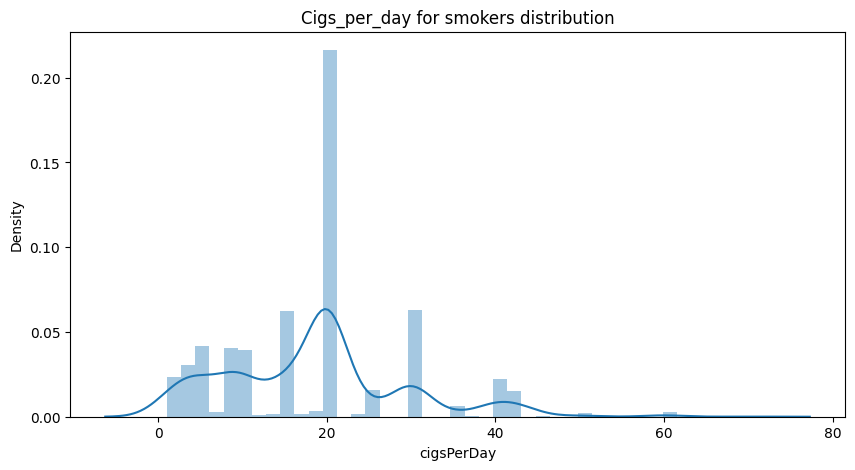

In [ ]:
# distribution of number of cigarettes per day for smokers (excluding non-smokers)
plt.figure(figsize=(10,5))
sns.distplot(df[df['is_smoking']==1]['cigsPerDay'])
plt.title('Cigs_per_day for smokers distribution')
plt.show()

In [ ]:
# Imputing the missing values in the cigs_per_day
df['cigsPerDay'] = df['cigsPerDay'].fillna(df[df['is_smoking']==1]['cigsPerDay'].median())




In [ ]:
# Checking for any wrong entries where the patient is not a smoker and cigarettes per day above 0

df[(df['is_smoking']==0) & (df['cigsPerDay']>0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
# Checking for any wrong entries where the patient is a smoker
# and cigarettes per day is 0

df[(df['is_smoking']==1) & (df['cigsPerDay']==0)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


There are no errors in the above 2 columns

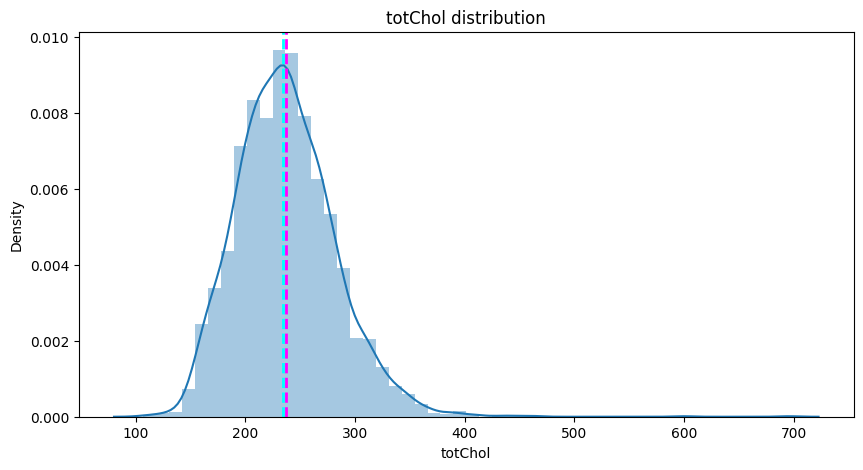

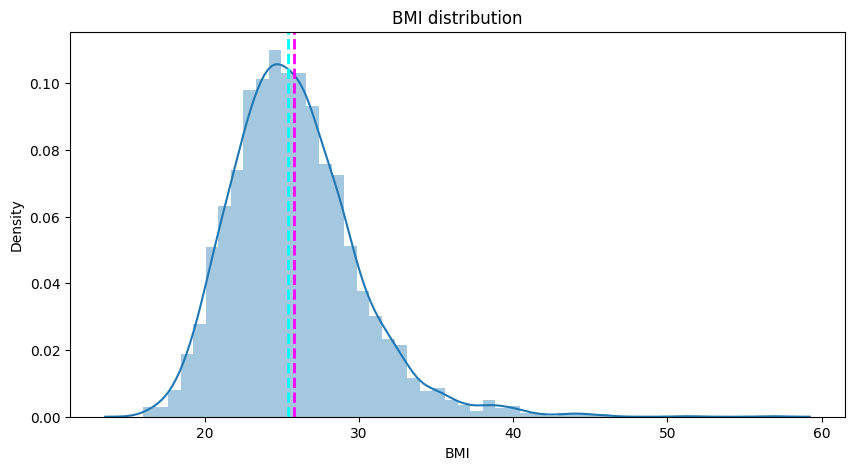

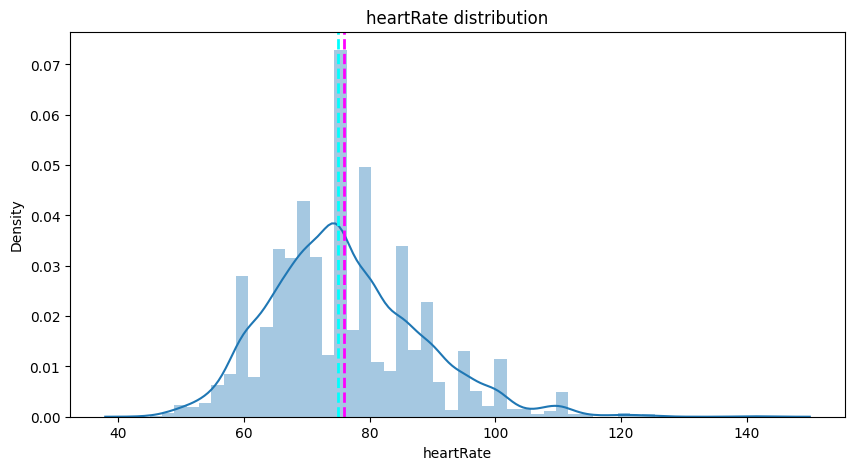

In [ ]:
# Checking the distribution of the total_cholesterol, bmi, and heart_rate
for i in ['totChol','BMI','heartRate']:
  plt.figure(figsize=(10,5))
  sns.distplot(df[i])
  plt.axvline(df[i].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[i].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(i+' distribution')
  plt.show()




The totChol, BMI, and heartRrate columns are positively skewed

In [ ]:
# Mean and median for total_cholesterol
df.totChol.mean(),df.totChol.median()

(237.07428400954655, 234.0)

In [ ]:
# Mean and median for heart_rate
df.heartRate.mean(),df.heartRate.median()


(75.97727943346119, 75.0)

In [ ]:
# Mean and median for BMI
df.BMI.mean(),df.BMI.median()

(25.7949644549763, 25.38)

In [ ]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df['totChol']   = df['totChol'].fillna(df['totChol'].median())
df['BMI']       = df['BMI'].fillna(df['BMI'].median())
df['heartRate'] = df['heartRate'].fillna(df['heartRate'].median())

In [ ]:
# mean and median of totChol after median imputation
df.totChol.mean(),df.totChol.median()

#

(237.03982300884957, 234.0)

In [ ]:
 #mean and median of BMI after median imputation
df.BMI.mean(),df.BMI.median()




(25.793250737463126, 25.38)

In [ ]:
# mean and median of heartRate after median imputation
df.heartRate.mean(),df.heartRate.median()

(75.97699115044247, 75.0)

In [ ]:
# total missing values in glucose
df.glucose.isna().sum()


304

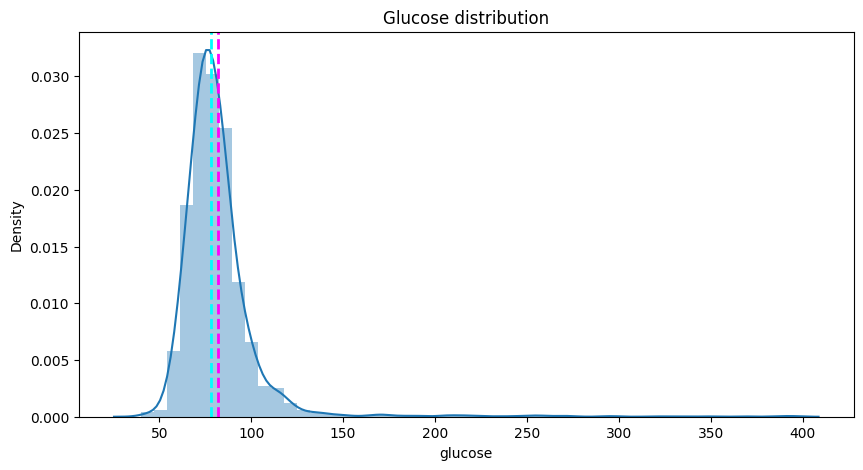

In [ ]:
# distribution of glucose
plt.figure(figsize=(10,5))
sns.distplot(df['glucose'])
plt.axvline(df['glucose'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['glucose'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Glucose distribution')
plt.show()

The glucose column is positively(right) skewed.

In [ ]:
# Mean, median, and mode for glucose
df.glucose.mean(),df.glucose.median(),df.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

* There are 304 missing values in the glucose column. If we choose to impute them with a single value of mean / median, we will be adding high bias at that point.
* To avoid this we can impute the missing values using KNN imputer.

In [ ]:
# Using KNN imputer with K=10
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(df)
df = pd.DataFrame(imputed, columns=df.columns)




In [ ]:
# checking for missing values
df.isna().sum(), print(f" Total number of rows and columns are =",{df.shape})

 Total number of rows and columns are = {(3390, 16)}


(age                0
 education          0
 sex                0
 is_smoking         0
 cigsPerDay         0
 BPMeds             0
 prevalentStroke    0
 prevalentHyp       0
 diabetes           0
 totChol            0
 sysBP              0
 diaBP              0
 BMI                0
 heartRate          0
 glucose            0
 TenYearCHD         0
 dtype: int64,
 None)

We have successfully handled all the missing values in the dataset.

In [ ]:
df.shape

(3390, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   float64
 1   education        3390 non-null   float64
 2   sex              3390 non-null   float64
 3   is_smoking       3390 non-null   float64
 4   cigsPerDay       3390 non-null   float64
 5   BPMeds           3390 non-null   float64
 6   prevalentStroke  3390 non-null   float64
 7   prevalentHyp     3390 non-null   float64
 8   diabetes         3390 non-null   float64
 9   totChol          3390 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3390 non-null   float64
 13  heartRate        3390 non-null   float64
 14  glucose          3390 non-null   float64
 15  TenYearCHD       3390 non-null   float64
dtypes: float64(16)
memory usage: 423.9 KB


* The KNN imputer has converted all the columns to the float64 datatype. Hence, changing the column datatype accordingly as per the kind of data stored in the respective column.

In [ ]:
# changing datatypes
df = df.astype({'age': int, 'education':int,'sex':int,'is_smoking':int,'cigsPerDay':int,
               'BPMeds':int,'prevalentStroke':int,'prevalentHyp':int,'diabetes':int,
               'totChol':float,'sysBP':float,'diaBP':float,
               'BMI':float,'heartRate':float,'glucose':float,'TenYearCHD':int})

**What all missing value imputation techniques have you used and why did you use those techniques?**


* We had total 510 null values in our dataset in 7 different columns.
First of all we impute the categorical columns (education & BPMeds) with mode.
* Second in cigsPerDay column we seperated smokers and non smokers , then we found the null_values in smokers and later on imputed with Median.
* Third we imputed the tooChol, BMI & heartRate with Median.
At last glucose column had the max. null values and outliers, so imputing these values with mean, median and mode will add high bias. so we used the KNN imputer k=10.
-After KNN imputation, there is no massive change in the values of mean. And the values of median and mode remain the same.

# 4.3.  Feature Manipulation

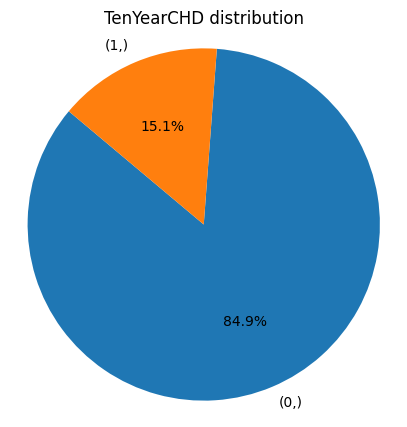

TenYearCHD
0             2879
1              511
dtype: int64

In [ ]:
# Assuming you have imported your data and defined the dependent_var variable

# Calculate the value counts for the dependent variable
value_counts = df[dependent_var].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(dependent_var[0] + ' distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Distribution of TenYearCHD
df[dependent_var].value_counts()


- The dependent variable - 10-year risk of coronary heart disease is unbalanced. Only ~15% of the patients in the study were eventually exposed to the risk of this heart disease, rest of the patients were not exposed to this disease after the end of 10 year study.



 # 4.4 Feature Selection

In [ ]:
# Creating a new column pulse_pressure and dropping sysBP and diaBP
df['pulse_pressure'] = df['sysBP']-df['diaBP']
df.drop('sysBP',axis=1,inplace=True)
df.drop('diaBP',axis=1,inplace=True)

- Pulse pressures of 50 mmHg or more can increase the risk of heart disease, - heart rhythm disorders, stroke and more.
- Higher pulse pressures are also thought to play a role in eye and kidney damage from diseases like diabetes.
- Low pulse pressure - is where the pulse pressure is one-fourth or less of the systolic blood pressure.
- This happens when your heart isn’t pumping enough blood, which is seen in heart failure and certain heart valve diseases. It also happens when a person has been injured and lost a lot of blood or is bleeding internally.

In [ ]:

# columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure'],
      dtype='object')

Text(0.5, 1.0, 'Pulse Pressure Distribution')

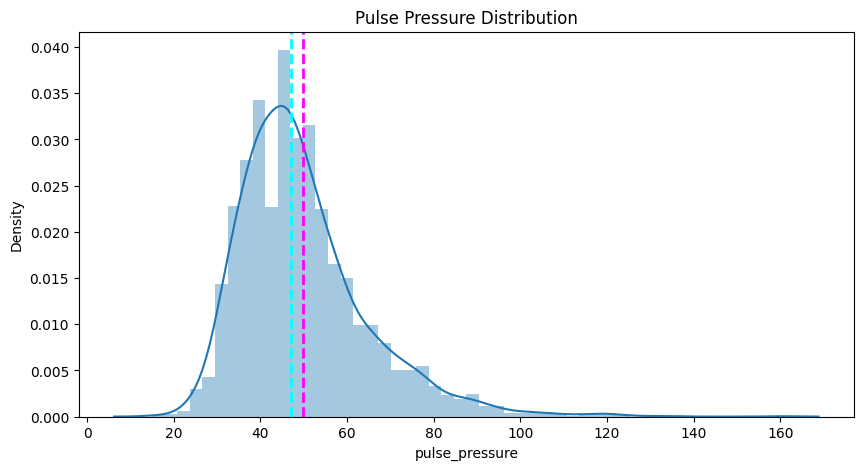

In [ ]:
# Analyzing the distribution of pulse_pressure
plt.figure(figsize=(10,5))
sns.distplot(df['pulse_pressure'])
plt.axvline(df['pulse_pressure'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df['pulse_pressure'].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.title('Pulse Pressure Distribution')


The pulse pressures are positively skewed

<Figure size 1000x500 with 0 Axes>

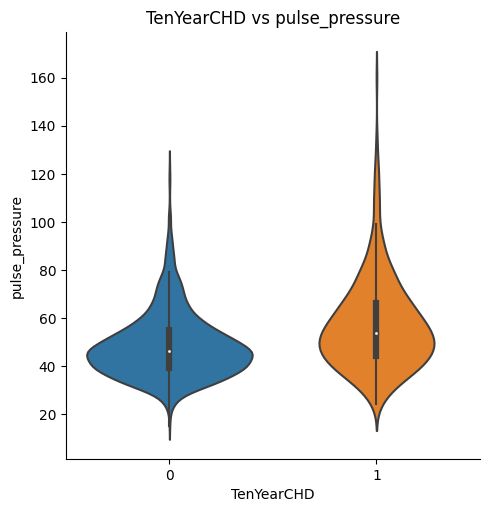

In [ ]:
# Relationship between pulse pressure with the dependent variable
plt.figure(figsize=(10,5))
sns.catplot(x=dependent_var[0],y='pulse_pressure',data=df,kind='violin')
plt.title('TenYearCHD vs pulse_pressure')
plt.show()


On average, the patients with higher pulse pressure are exposed to the coronary heart disease over the period of 10 years.

# 4.5. Handling Outliers

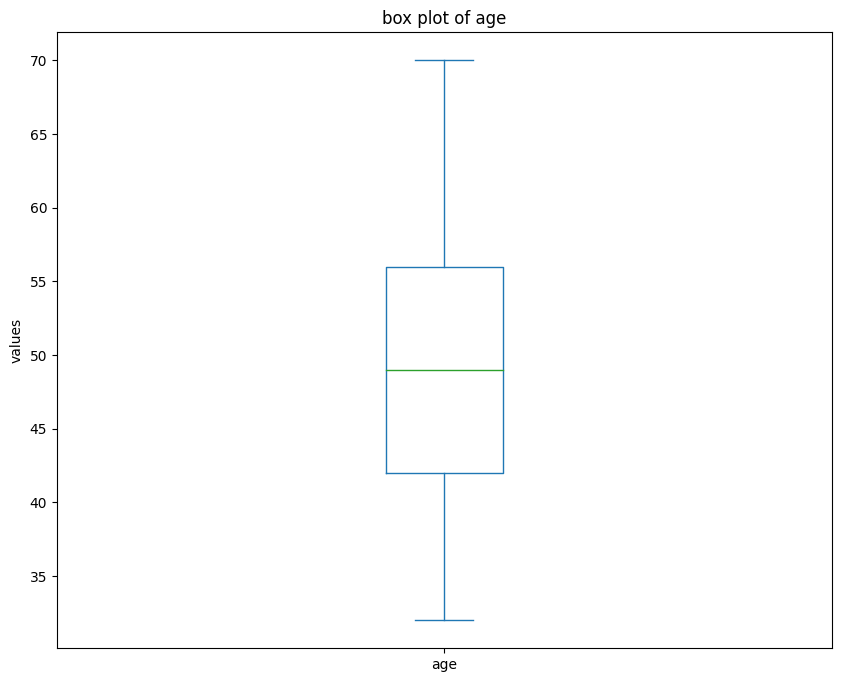

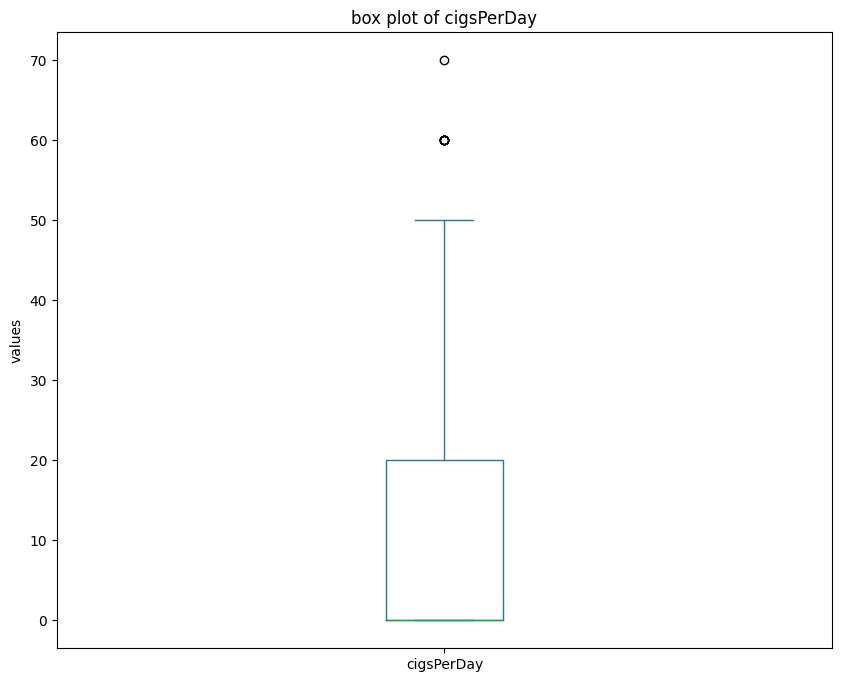

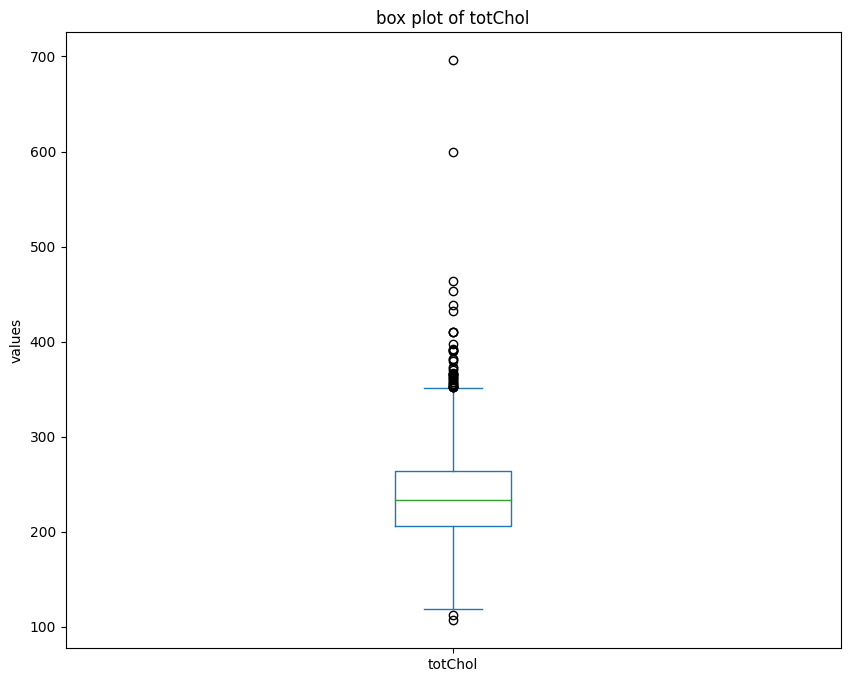

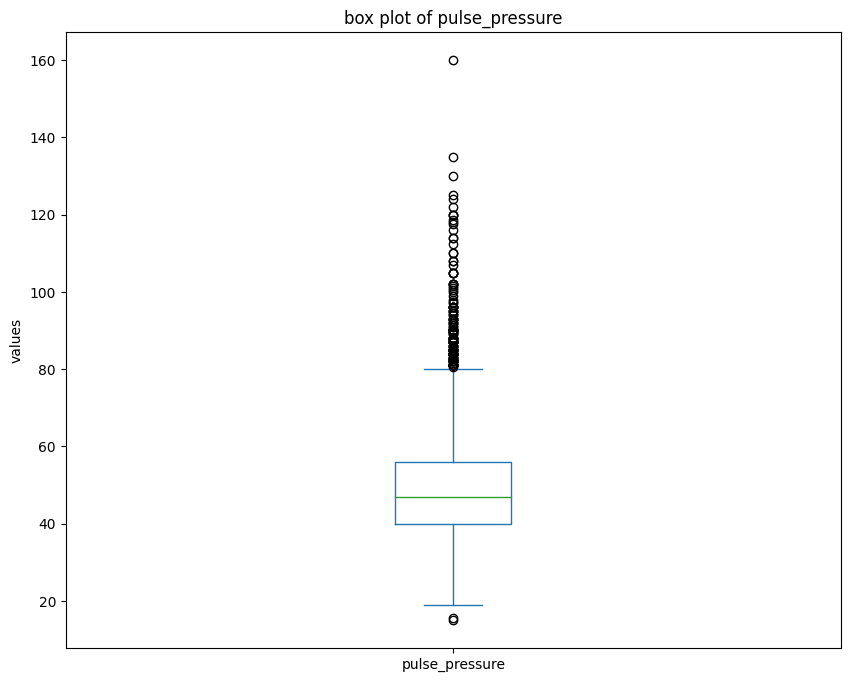

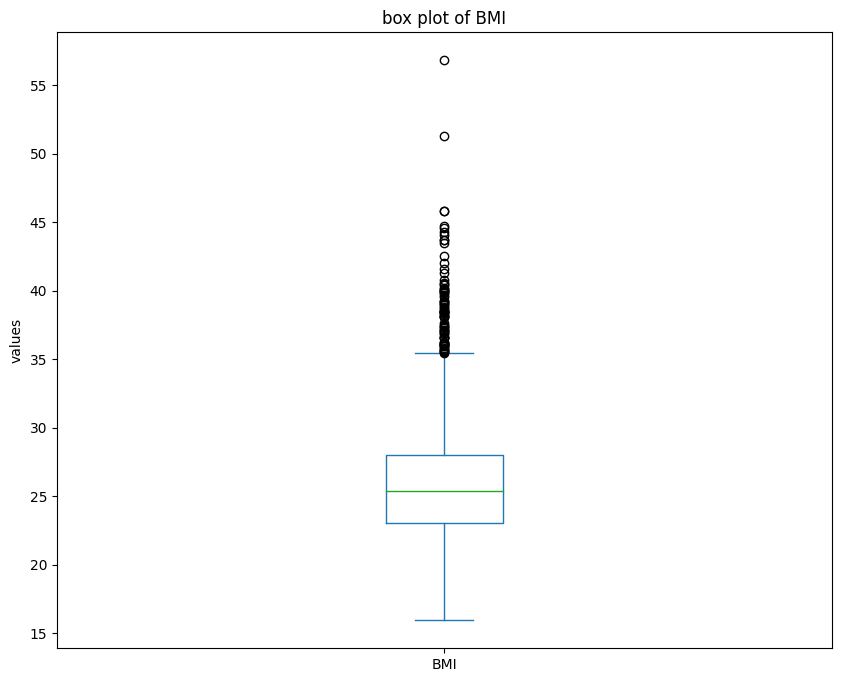

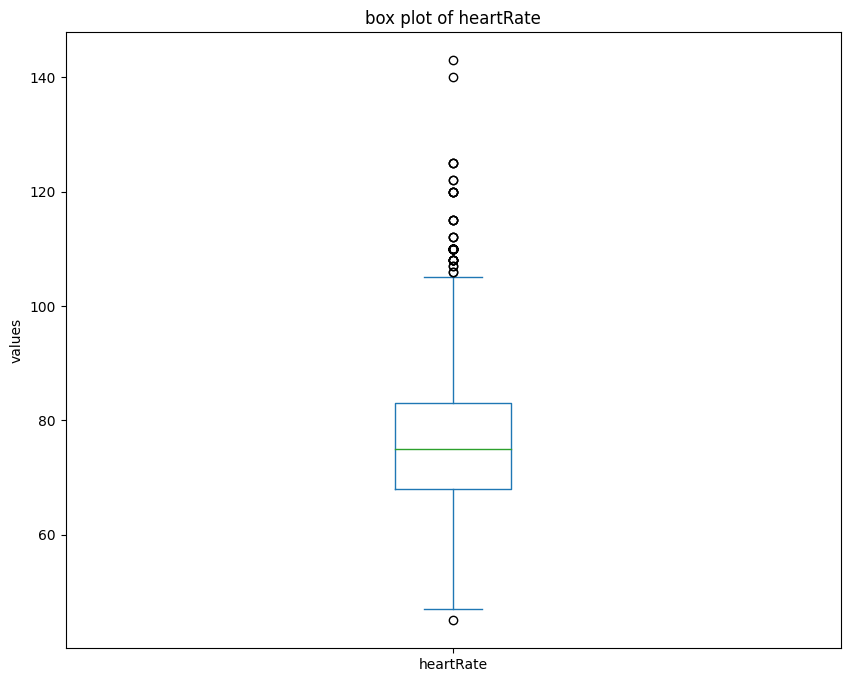

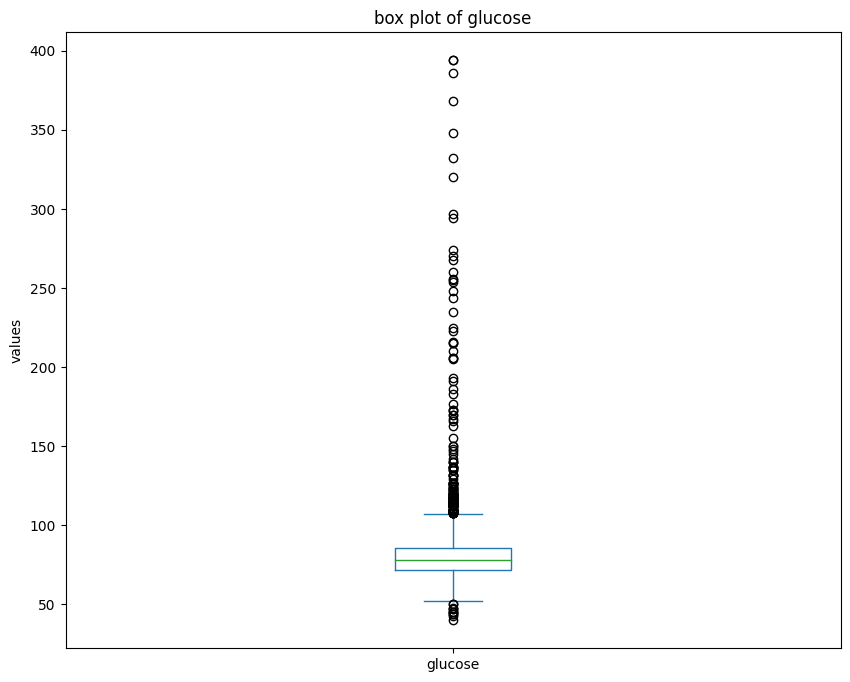

In [ ]:
# Visualizing the outliers using boxplots.
features = ['age','cigsPerDay','totChol', 'pulse_pressure', 'BMI', 'heartRate', 'glucose']
for col in features:
  plt.figure(figsize = (10,8))
  plt.gca()
  df[col].plot(kind = 'box')
  plt.ylabel('values')
  plt.title(f'box plot of {col}')

- There are outliers in the data, the effect of the outliers can be reduced to some extent by transforming it.

- Once the data is transformed, if outliers beyond 3 standard deviations from the mean still remain, then they can be imputed with its respective median value.

- This is done on the train data only to prevent data leakage.

# 4.6. Data Transformation

Transforming continuous variables to reduce skew:

In [ ]:
# Transform Your data
# skewness along the index axis

df[features].skew(axis = 0)



age               0.225796
cigsPerDay        1.204077
totChol           0.948170
pulse_pressure    1.412382
BMI               1.025551
heartRate         0.676660
glucose           6.361911
dtype: float64

Many continuous variables are skewed. By log transformation, we aim to reduce the magnitude of skew in these variables to a certain extent.

In [ ]:
# Skew for log10 transformation
np.log10(df[features]+1).skew(axis = 0)

age              -0.015053
cigsPerDay        0.275072
totChol           0.011860
pulse_pressure    0.354174
BMI               0.370422
heartRate         0.165898
glucose           2.310918
dtype: float64



We can clearly see that by log transformation of the continuous variables, we are able to reduce it's skew to some extent.

In [ ]:
# Checking skew after log transformation
df[features].skew(axis = 0)


age               0.225796
cigsPerDay        1.204077
totChol           0.948170
pulse_pressure    1.412382
BMI               1.025551
heartRate         0.676660
glucose           6.361911
dtype: float64

 Analyzing the distribution of transformed features:

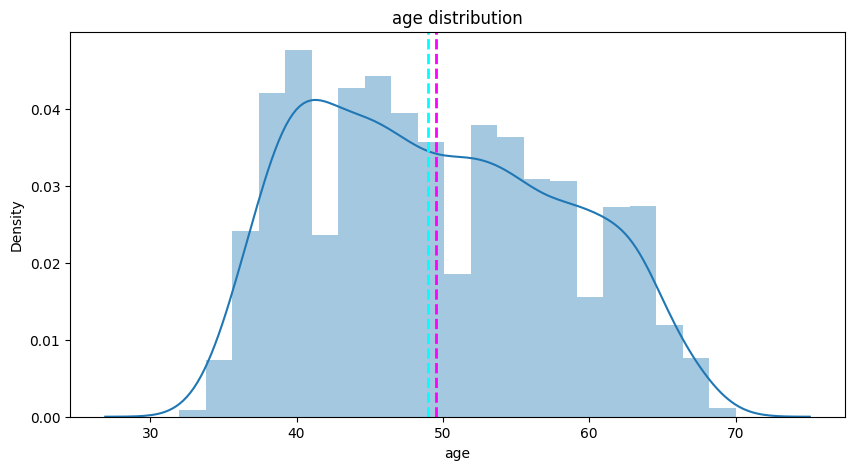

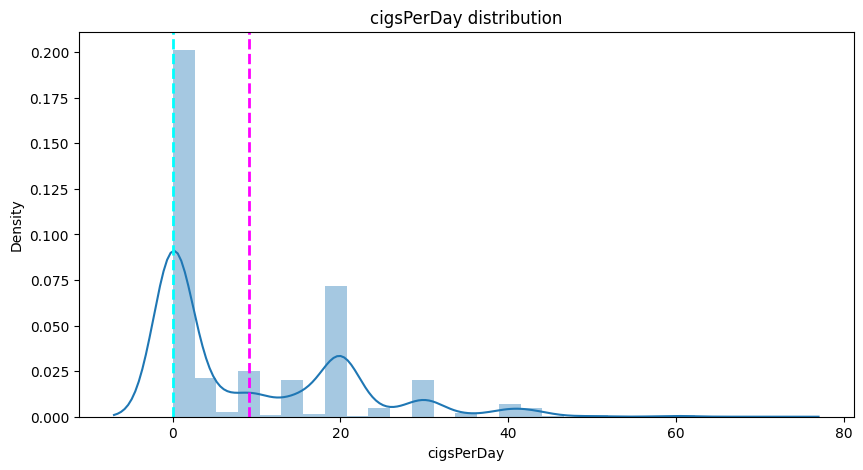

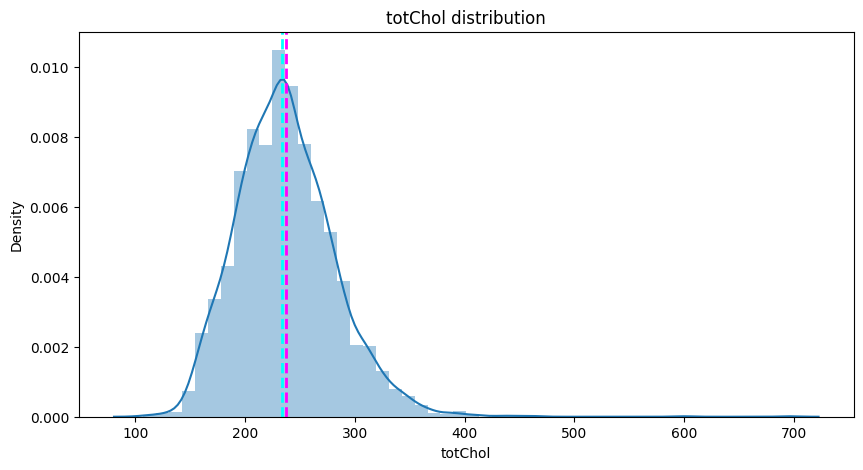

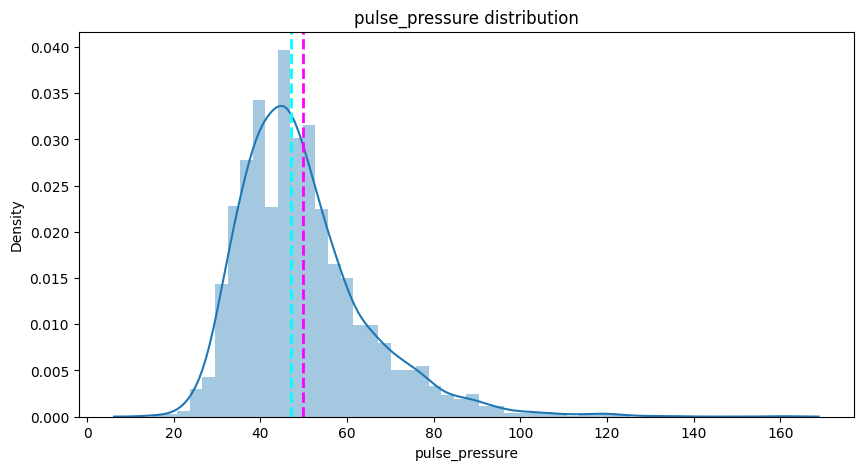

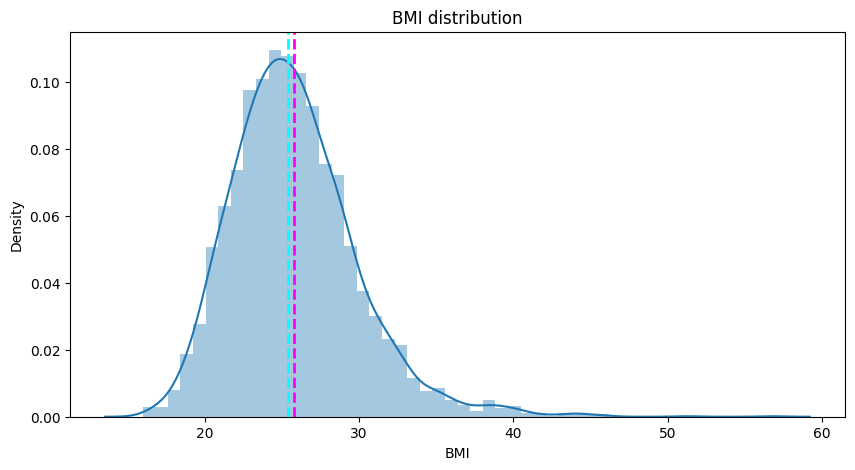

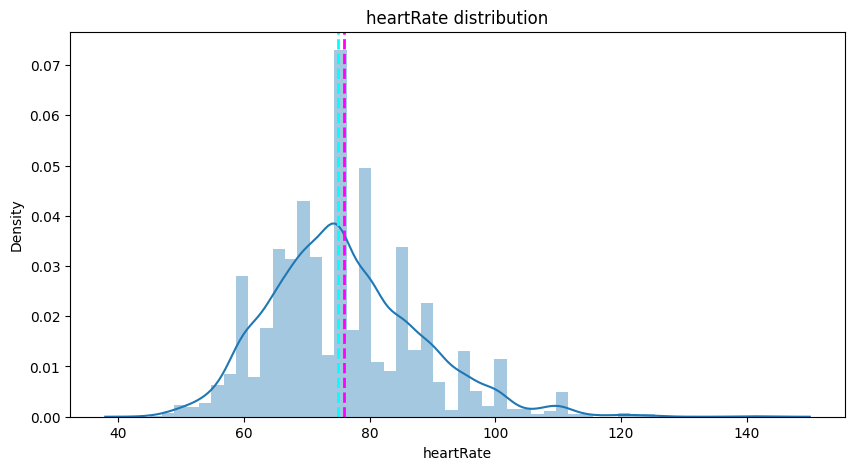

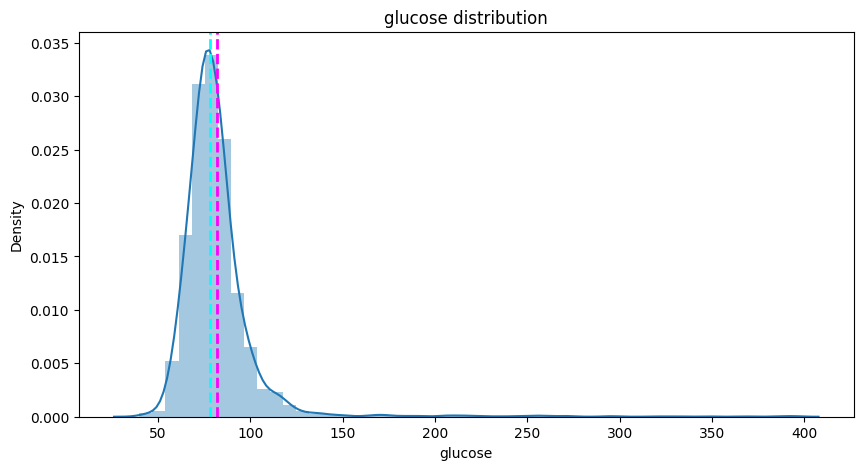

In [ ]:
# Analysing the distribution of continuous varaibles after transformation
for col in features:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**About outliers in transformed features:**

- Except for age and cigs_per_day columns, rest of the numerical columns contain outliers even after log transformation.
- To handle this, we can impute the outliers beyond 3 standard deviations from the mean with its median value on the train data.

#4.7. Data Scaling

In [ ]:
 #Scaling your data
from sklearn.preprocessing import RobustScaler

#Dropping dependent column
df_sc = df.drop(['TenYearCHD'],axis=1)

#running for loop for applying RobustScaler to each column
for col in df_sc:
  Ro_scaler = RobustScaler()
  df[col] = Ro_scaler.fit_transform(df[[col]])


In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,1.071429,0.0,0.0,1.0,0.15,0.0,0.0,0.0,0.0,-0.224138,0.000000,1.000000,0.142857,1,1.00000
1,-0.928571,1.0,1.0,0.0,0.00,0.0,0.0,1.0,0.0,-0.379310,0.883744,-0.200000,-0.214286,0,1.43750
2,-0.214286,-0.5,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.275862,-1.012582,0.866667,1.142857,0,-0.12500
3,0.071429,-0.5,1.0,1.0,1.00,0.0,0.0,1.0,0.0,-0.017241,0.579768,-0.466667,1.142857,1,1.43750
4,1.071429,-0.5,0.0,1.0,1.50,0.0,0.0,0.0,0.0,0.120690,0.209361,-0.333333,-0.071429,0,0.28125


We used the RobustScaler method
we use RobustScaler method because in our data there are still some outliers
RobustScaler method works great on outliers

# 5. **Handling Imbalanced Dataset**

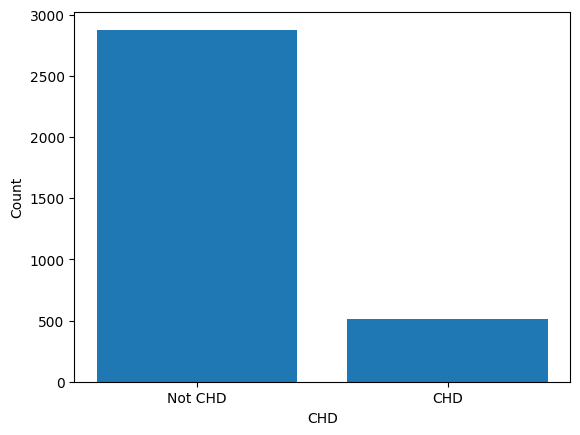

In [ ]:


# Assuming df is your DataFrame containing 'TenYearCHD' data

# Count the occurrences of each category
counts = df['TenYearCHD'].value_counts()

# Create a bar plot
plt.bar(['Not CHD', 'CHD'], counts)

# Set labels for the x-axis and y-axis
plt.xlabel('CHD')
plt.ylabel('Count')

# Show the plot
plt.show()


In [ ]:
# Creating the dataset with all independent variables
X = df.drop('TenYearCHD',axis=1)

# Creating the dataset with the dependent variable
Y = df['TenYearCHD']

**SMOTE**

stands for "Synthetic Minority Over-sampling Technique." It is a data augmentation technique commonly used in machine learning, particularly in the context of imbalanced datasets.

In [ ]:
#imputing SMOTE to handle imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3390
Resampled dataset shape 5758


<Axes: title={'center': 'count (TenYearCHD)'}>

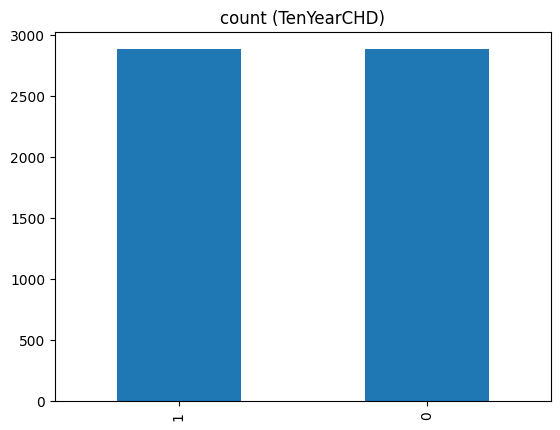

In [ ]:
y_smote.value_counts().plot(kind='bar', title='count (TenYearCHD)',)

#6.**Data Spliting:**

Spliting the data into train aor test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4030, 14)
Number transactions y_train dataset:  (4030,)
Number transactions X_test dataset:  (1728, 14)
Number transactions y_test dataset:  (1728,)


In [ ]:
df.shape

(3390, 15)

#7. ML Model - 1 ( **LogisticRegression** )

Logistic regression is a classification algorithm that predicts the probability of an outcome that can only have two values (i.e. a dichotomy). A logistic regression produces a logistic curve, which is limited to values between 0 and 1. Logistic regression models the probability that each input belongs to a particular category.

Logistic regression is an excellent tool to know for classification problems, which are problems where the output value that we wish to predict only takes on only a small number of discrete values. Here we'll focus on the binary classification problem, where the output can take on only two distinct classes.

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression

# Fit the Algorithm
lr = LogisticRegression(fit_intercept=True, max_iter=10000)
lr.fit(X_train, y_train)

# Predict on the model
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [0 1 0 ... 0 0 0]
test_preds  [1 0 1 ... 0 1 0]


In [ ]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_train_accuracy = accuracy_score(train_preds,y_train)
lr_test_accuracy = accuracy_score(test_preds,y_test)
# Calculate precision
lr_test_precision = precision_score(test_preds, y_test)
lr_train_precision = precision_score(train_preds, y_train)

# Calculate recall
lr_test_recall = recall_score(test_preds, y_test)
lr_train_recall = recall_score(train_preds, y_train)

# Calculate F1 score
lr_test_f1 = f1_score(test_preds, y_test)
lr_train_f1 = f1_score(train_preds, y_train)

# Print the results

print(f"test_accuracy is {lr_test_accuracy }")
print(f"train_accuracy is  {lr_train_accuracy}")
print('\n')
print(f"test_Precision is {lr_test_precision}")
print(f"train_Precision is {lr_train_precision}")
print('\n')
print(f"test_Recall is {lr_test_recall}")
print(f"train_Recall is {lr_train_recall}")
print('\n')
print(f"test_F1 Score is {lr_test_f1}")
print(f"train_F1 Score is {lr_train_f1}")

test_accuracy is 0.6579861111111112
train_accuracy is  0.6729528535980149


test_Precision is 0.6596452328159645
train_Precision is 0.6646433990895296


test_Recall is 0.676905574516496
train_Recall is 0.6673438293550026


test_F1 Score is 0.6681639528354857
train_F1 Score is 0.6659908768373036


**Precision:** It calculates the ratio of how well your model classified True positives from all the observations that were classified as 1.

*Percison* = TP / [TP + FP]

*Interpretation of precision:*
- The precision for both the training data and testing data is not high.
- This means that out of all actual CHD patients our model predicts only a handful of them as CHD patients.

**Recall:** It calculates the ratio of how well your model classified True positives from all the observations whose true value or actual value is 1.

*Recall* = TP / [FN + TP]

*Interpretation of Recall:*
* The recall for both training and testing data is not high too.
* This means that out of all the predicted CHD patients only a handful of them are actual CHD patients.

**f1-score:** It is the harmonic mean of precision and recall.

*f1-score* = 2 * ((percesion * recall) / (percesion + recall))

*Interpretation of f1-score:*
* The higher the f1 score, the better the model performance.
* In this case for both training and testing data the f1 score is not high enough.

**On what metric should we focus on?**

- When our dataset is balanced, accuracy is the metric we can focus on.
-But when our dataset is imbalanced, We need to focus on percision or recall(depending on the contexts).

In this context, reducing the FN(actual:1,predicted:0) is important. Hence, we need to optimize our model towards recall((TP/FN + TP). If the model predicts those who have CHD as not have CHD then that person might be in danger.

When we don't know the context, We need to focus on F-1 score.

 Explain the ML Model used and it's performance using Evaluation metric Score Chart.
 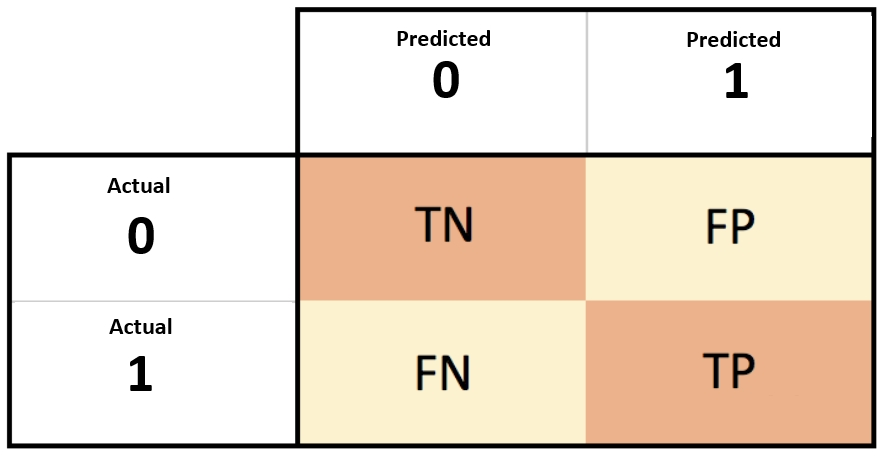

confusion_matrix Score is 
[[1398  655]
 [ 663 1314]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


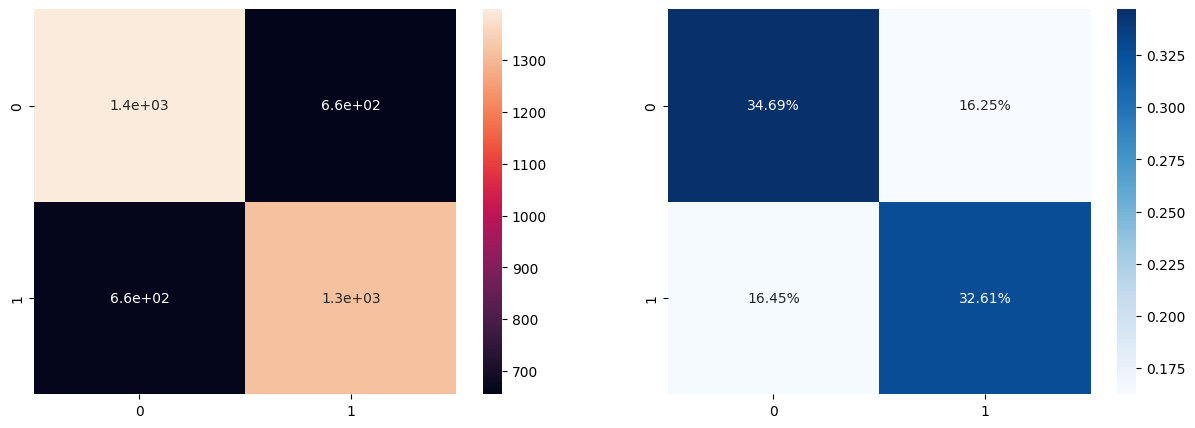

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))


confusion_matrix Score is 
[[542 284]
 [307 595]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


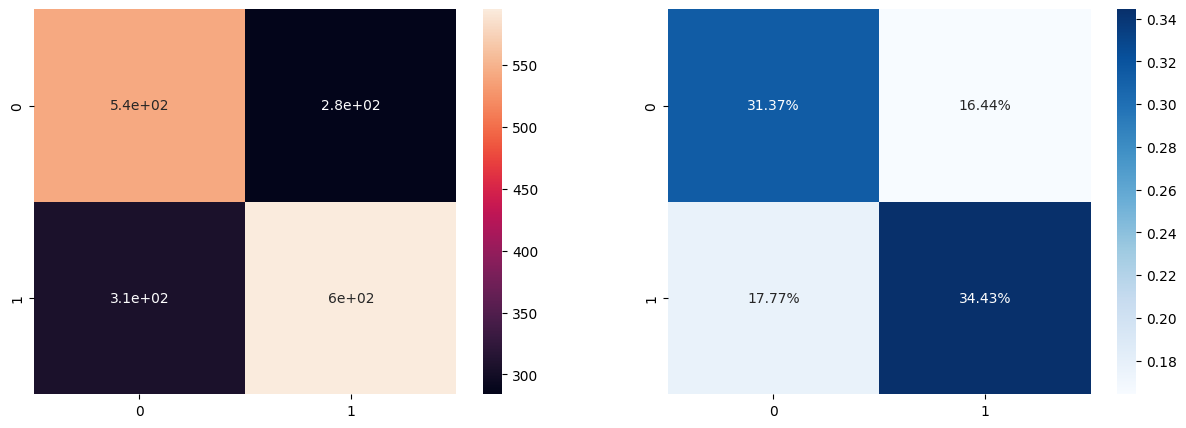

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import confusion_matrix

labels = ['NO CHD', 'CHD']
cf_matrix = confusion_matrix(y_test, test_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

In [ ]:
#checking the accuracy by using roc_auc curve
lr_train_roc_auc_score = roc_auc_score(train_preds,y_train)
lr_test_roc_auc_score = roc_auc_score(test_preds,y_test)

print(f'The training roc_auc_score of the is {lr_train_roc_auc_score} & the testing score is {lr_test_roc_auc_score}')


The training roc_auc_score of the is 0.6728276643136003 & the testing score is 0.6576518449732067


#  Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# define a dictionary of hyperparameters and their values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2'],
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# create a GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best Accuracy:  0.673697270471464


# ML Model - 2 ( **KNeighborsClassifier** )

K-nearest neighbors (kNN) is a supervised machine learning algorithm that can be used to solve both classification and regression tasks. kNN as an algorithm seems to be inspired from real life. People tend to be effected by the people around them. Our behaviour is guided by the friends we grew up with. Our parents also shape our personality in some ways. If you grow up with people who love sports, it is higly likely that you will end up loving sports. There are ofcourse exceptions. kNN works in a similar fashion.

In [ ]:
#implementing kNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=2)
# Fit the Algorithm
kn.fit(X_train, y_train)

# Predict on the model
train_preds = kn.predict(X_train)
test_preds = kn.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [1 0 0 ... 0 0 0]
test_preds  [0 0 0 ... 1 0 0]


In [ ]:
# Get the accuracy scores
from sklearn.metrics import accuracy_score

knn_train_accuracy = accuracy_score(train_preds,y_train)
knn_test_accuracy = accuracy_score(test_preds,y_test)

# Calculate precision
knn_test_precision = precision_score(test_preds, y_test)
knn_train_precision = precision_score(train_preds, y_train)

# Calculate recall
knn_test_recall = recall_score(test_preds, y_test)
knn_train_recall = recall_score(train_preds, y_train)

# Calculate F1 score
knn_test_f1 = f1_score(test_preds, y_test)
knn_train_f1 = f1_score(train_preds, y_train)

# Print the results

print(f"test_accuracy is {knn_test_accuracy }")
print(f"train_accuracy is  {knn_train_accuracy}")
print('\n')
print(f"test_Precision is {knn_test_precision}")
print(f"train_Precision is {knn_train_precision}")
print('\n')
print(f"test_Recall is {knn_test_recall}")
print(f"train_Recall is {knn_train_recall}")
print('\n')
print(f"test_F1 Score is {knn_test_f1}")
print(f"train_F1 Score is {knn_train_f1}")

test_accuracy is 0.8657407407407407
train_accuracy is  0.9918114143920596


test_Precision is 0.9290465631929047
train_Precision is 0.9833080424886191


test_Recall is 0.8330019880715706
train_Recall is 1.0


test_F1 Score is 0.8784067085953878
train_F1 Score is 0.991583779648049


In [ ]:

# Checking out the performance of the model.
knn_train_roc_auc_score = roc_auc_score(y_train,train_preds)
knn_test_roc_auc_score = roc_auc_score(y_test,test_preds)

print(f'The training roc_auc_score of the is {knn_train_roc_auc_score} & the testing score is {knn_test_roc_auc_score}')


The training roc_auc_score of the is 0.9916540212443096 & the testing score is 0.862828366342215


confusion_matrix Score is 
[[2053    0]
 [  33 1944]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


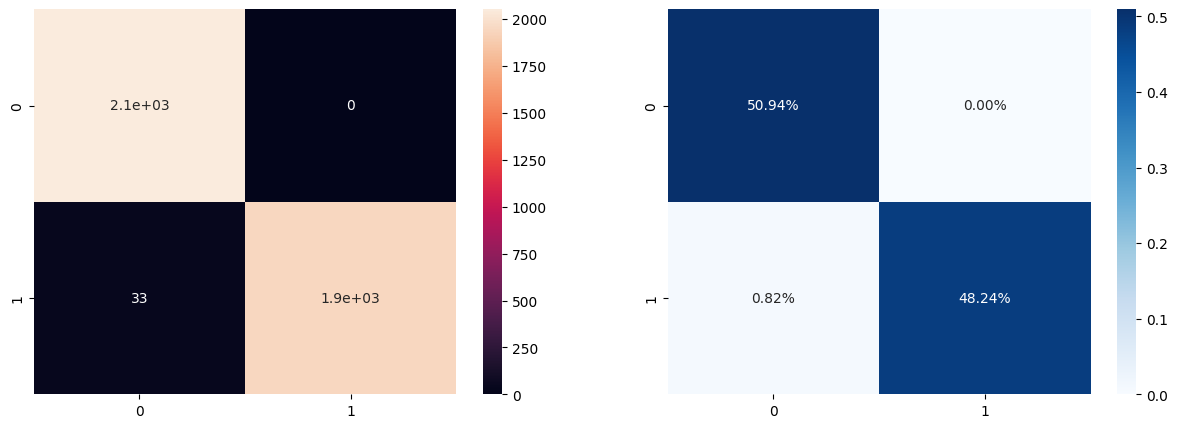

In [ ]:
#evaluation using confusion matrix on train data
cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

confusion_matrix Score is 
[[658 168]
 [ 64 838]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


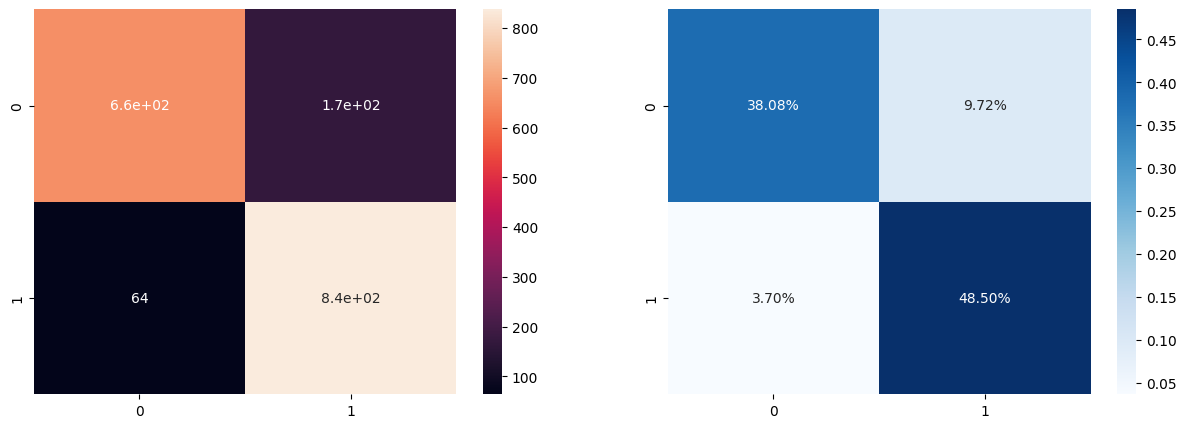

In [ ]:
#evaluating using confusion matrix for test data
cf_matrix = confusion_matrix(y_test, test_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

#Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV


# define a dictionary of hyperparameters and their values
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
              'metric': ['euclidean', 'manhattan', 'cosine'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

# create a GridSearchCV object
grid_search = GridSearchCV(kn, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)


Best Hyperparameters:  {'algorithm': 'ball_tree', 'metric': 'manhattan', 'n_neighbors': 1}
Best Accuracy:  0.862531017369727


# ML Model - 3 ( DecisionTreeClassifier )

In [ ]:

# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=22)

# Fit the Algorithm
decision_tree.fit(X_train, y_train)

# Predict on the model
train_preds = decision_tree.predict(X_train)
test_preds = decision_tree.predict(X_test)
print(f'train_preds {train_preds}')
print(f'test_preds  {test_preds}')

train_preds [1 0 0 ... 0 0 0]
test_preds  [0 0 0 ... 1 0 0]


In [ ]:
#calculate accuracy
tree_train_accuracy = accuracy_score(train_preds,y_train)
tree_test_accuracy = accuracy_score(test_preds,y_test)

# Calculate precision
tree_test_precision = precision_score(test_preds, y_test)
tree_train_precision = precision_score(train_preds, y_train)

# Calculate recall
tree_test_recall = recall_score(test_preds, y_test)
tree_train_recall = recall_score(train_preds, y_train)

# Calculate F1 score
tree_test_f1 = f1_score(test_preds, y_test)
tree_train_f1 = f1_score(train_preds, y_train)

# Print the results

print(f"test_accuracy is {tree_test_accuracy }")
print(f"train_accuracy is  {tree_train_accuracy}")
print('\n')
print(f"test_Precision is {tree_test_precision}")
print(f"train_Precision is {tree_train_precision}")
print('\n')
print(f"test_Recall is {tree_test_recall}")
print(f"train_Recall is {tree_train_recall}")
print('\n')
print(f"test_F1 Score is {tree_test_f1}")
print(f"train_F1 Score is {tree_train_f1}")

test_accuracy is 0.8009259259259259
train_accuracy is  1.0


test_Precision is 0.8215077605321508
train_Precision is 1.0


test_Recall is 0.801948051948052
train_Recall is 1.0


test_F1 Score is 0.8116100766703177
train_F1 Score is 1.0


In [ ]:
# Checking out the performance of the model.
tree_train_roc_auc_score = roc_auc_score(y_train,train_preds)
tree_test_roc_auc_score = roc_auc_score(y_test,test_preds)

print(f'The training roc_auc_score of the is {tree_train_roc_auc_score} & the testing score is {tree_test_roc_auc_score}')

The training roc_auc_score of the is 1.0 & the testing score is 0.7999790618641385


confusion_matrix Score is 
[[2053    0]
 [   0 1977]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


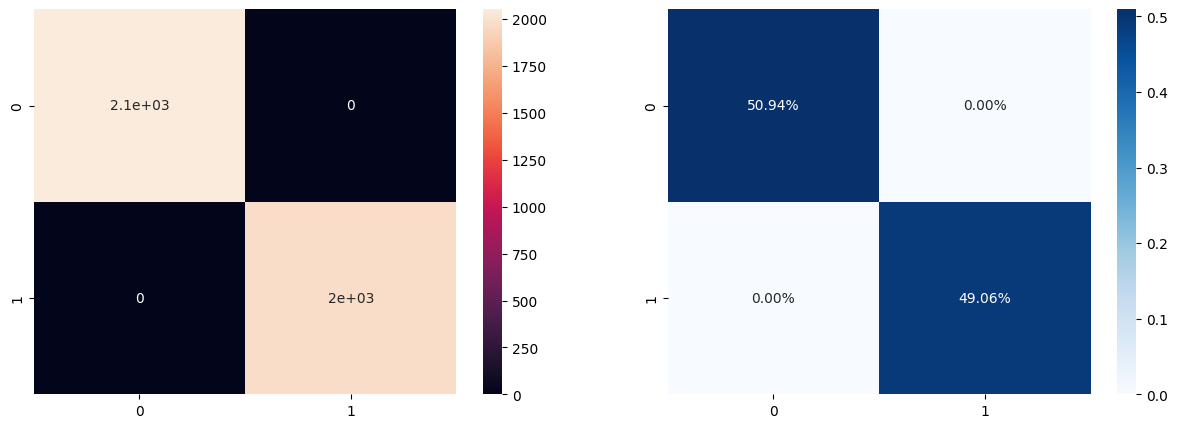

In [ ]:
# Visualizing evaluation Metric Score chart for train data
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_train, train_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

confusion_matrix Score is 
[[643 183]
 [161 741]]

Axes(0.125,0.11;0.281818x0.77)
Axes(0.547727,0.11;0.281818x0.77)


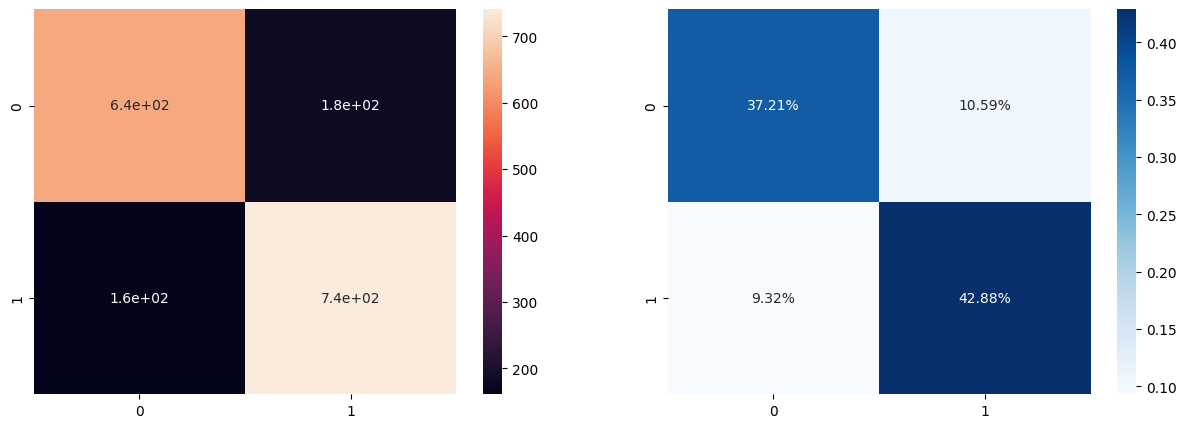

In [ ]:
# Visualizing evaluation Metric Score  for test data
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, test_preds)

print(f'confusion_matrix Score is \n{cf_matrix}\n')

import seaborn as sns
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
print(sns.heatmap(cf_matrix, annot=True))
plt.subplot(1, 2, 2)
print(sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues'))

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# define a dictionary of hyperparameters and their values
param_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'criterion': ['gini', 'entropy']}

# Fit the Algorithm
grid_search = GridSearchCV(decision_tree, param_grid, cv=5)

# fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy:  0.775682382133995


#8. **Comparision of classifiers:**

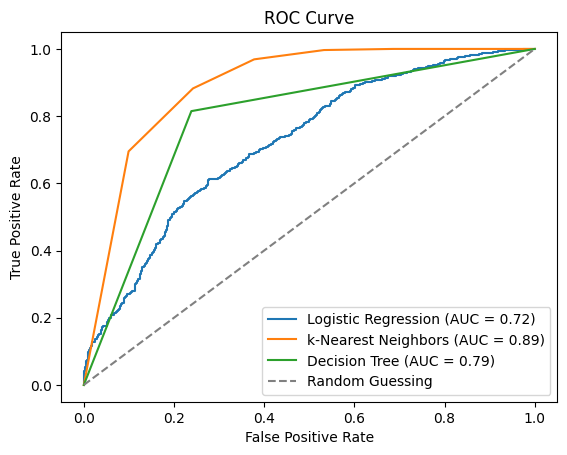

Logistic Regression AUC: 0.72
k-Nearest Neighbors AUC: 0.89
Decision Tree AUC: 0.79


In [ ]:

# Initialize the classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('k-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Create an empty dictionary to store the AUC scores
auc_scores = {}

# Plot ROC curve for each classifier
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores[name] = auc
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

# Plot the ROC curve for random guessing (no skill)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

# Print the AUC scores
for name, auc in auc_scores.items():
    print(f'{name} AUC: {auc:.2f}')







#9. **Model Explainability using Eli5:**

- Using Eli5, I will be perfroming global, and local model explainability for logistic model since Eli5 doesn't work for KNN.

* **Note:** Eli5 isn't supported for hypertuned models.

In [ ]:
pip install eli5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=a4927c220d1fd37dfd08dd99a19b7a252d88f2dd07ac7fc72465890731f60fee
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(lr, random_state=42)

# Fit the PermutationImportance instance to your test data
perm.fit(X_test, y_test)

# Display feature importances
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

# Explain an individual prediction
observation_idx = 0  # Replace with the index of the observation you want to explain
explanation = eli5.explain_prediction(lr, X_test.iloc[observation_idx])
explanation


Explanation(estimator='LogisticRegression(max_iter=10000)', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='age', weight=1.0705219690913717, std=None, value=1.0714285714285714), FeatureWeight(feature='sex', weight=0.39108095961835326, std=None, value=1.0), FeatureWeight(feature='glucose', weight=0.02744459947770153, std=None, value=0.21428571428571427), FeatureWeight(feature='heartRate', weight=0.00036931593844710225, std=None, value=-0.3333333333333333)], neg=[FeatureWeight(feature='<BIAS>', weight=-1.0278703322742655, std=None, value=1.0), FeatureWeight(feature='pulse_pressure', weight=-0.0883282777652642, std=None, value=-0.375), FeatureWeight(feature='education', weight=-0.07082858528060121, std=None, value=0.5), FeatureWeight(feature='totChol', weight=-0.023928068422356955, std=None, value=-0.1206896551724138), FeatureWeight(feature='BMI', weight=-0.016297835508527404, std=None, value=-0.42073477604428805)], pos_remaining=0, neg_remaining=0), proba=0.5651681136335459, score=0.26216374487485816, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

- y=1 indicates that the model predicted a positive class outcome (class 1).
- probability 0.565 represents the estimated probability that the predicted outcome is class 1. In this case, the model assigned a probability of 0.565 to this prediction.
- score 0.262 could refer to a model score or some form of confidence score associated with the prediction.

- Each feature has a contribution score, indicating whether it positively (+) or negatively (-) influenced the prediction.
The features are listed along with their contribution scores, in descending order of influence.

- age had the most positive influence on the prediction with a contribution of +1.071, indicating that as the age increases, the model is more likely to predict a positive outcome.

**Which ML model did you choose from the above created models as your final prediction model and why?**

- We Consider the K-Neighbour-Classifier as our final Prediction model .
- The accuracy on train data is 0.9915632754342432 .
- The accuracy on test data is 0.8836805555555556 .
- The reason is Testing accuracy.

#**Conclusion:**

* In this project of Coronary Heart Disease (CHD) analysis, we have worked on several parameters which would help us in predicting the Probability of a persons getting a CHD in next 10years.

* In the initial phase, we focused more on the problem statements and data cleaning, in order to ensure that we give them the best results out of our analysis.

**We needs to focus more on :**

- A Patient smokes or not? if yes, then how many ciggrattes per day.
- Weather a patient has any history of HeartStroke & HyperTension.
- Weather a Patient takes BP & Diabetes medicines.
- A patient's BMI(18.5-25bmi) & HeartRate(60-140) range.
- If we mainly focus on these above point then, we can predict that one will get any CHD disease in next 10 years or more.

**QUE.-> How Our ML Model can help in detection for the CHD?**

- We used 3 different ML algorithms, LOGISTIC REGRESSION, K_NEAREST_CLASSIFIER, & DECISION TREE from all these ML-model ,
- we found the K_nearest_classifier the most suitable and better, so we implemented it.

Machine learning (ML) can be very helpful in the prediction of heart attacks in which different risk factors like high blood pressure, high cholesterol, abnormal pulse rate, diabetes, etc... can be considered. The objective of this study is to optimize the prediction of heart disease using ML.